In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('Trumps Legcy.csv')

In [3]:
df.head()

id                                               text  \
0    98455000000000000  Republicans and Democrats have both created ou...   
1  1234650000000000000  I was thrilled to be back in the Great city of...   
2  1218010000000000000  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1304880000000000000  The Unsolicited Mail In Ballot Scam is a major...   
4  1218160000000000000  RT @MZHemingway: Very friendly telling of even...   

               device  favorites  retweets             date  
0           TweetDeck         49       255   8/2/2011 18:07  
1  Twitter for iPhone      73748     17404    3/3/2020 1:34  
2  Twitter for iPhone          0      7396   1/17/2020 3:22  
3  Twitter for iPhone      80527     23502  9/12/2020 20:10  
4  Twitter for iPhone          0      9081  1/17/2020 13:13

In [4]:
df.tail()

id                                               text  \
56566  1319490000000000000  RT @RandPaul: I don’t know why @JoeBiden think...   
56567  1319480000000000000  RT @EliseStefanik: President @realDonaldTrump ...   
56568  1319440000000000000  RT @TeamTrump: LIVE: Presidential Debate #Deba...   
56569  1319380000000000000  Just signed an order to support the workers of...   
56570  1319350000000000000  Suburban women want Safety &amp; Security. Joe...   

                   device  favorites  retweets              date  
56566  Twitter for iPhone          0     20683   10/23/2020 3:46  
56567  Twitter for iPhone          0      9869   10/23/2020 3:42  
56568  Twitter for iPhone          0      8197   10/23/2020 1:03  
56569  Twitter for iPhone     176289     36001  10/22/2020 21:04  
56570  Twitter for iPhone      95169     19545  10/22/2020 18:31

In [5]:
df.shape

(56571, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         56571 non-null  int64 
 1   text       56571 non-null  object
 2   device     56571 non-null  object
 3   favorites  56571 non-null  int64 
 4   retweets   56571 non-null  int64 
 5   date       56571 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


In [7]:
df.describe()

id     favorites       retweets
count  5.657100e+04  5.657100e+04   56571.000000
mean   7.987865e+17  2.834955e+04    8618.987467
std    3.826616e+17  5.781564e+04   13306.132408
min    1.698309e+09  0.000000e+00       0.000000
25%    4.606190e+17  1.000000e+01      59.000000
50%    7.471020e+17  1.640000e+02    3450.000000
75%    1.193130e+18  4.393850e+04   13014.500000
max    1.347570e+18  1.869706e+06  408866.000000

In [8]:
df.columns

Index(['id', 'text', 'device', 'favorites', 'retweets', 'date'], dtype='object')

In [9]:
df_td_retweets = df.groupby('device')['retweets'].mean().sort_values(ascending=False) * 100 / len(df['retweets'])

In [10]:
df_td_retweets

device
Twitter Media Studio        32.897718
Twitter for iPhone          28.347616
Twitter for iPad            20.397200
Twitter Ads                  9.271170
Media Studio                 4.731223
Periscope                    3.037397
Twitter Web App              2.837778
Twitter for Android          2.715784
Twitter QandA                1.912464
Twitter Mirror for iPad      1.286878
Twitter Web Client           1.170837
Instagram                    0.685040
TweetDeck                    0.677913
Twitter for BlackBerry       0.464064
Vine - Make a Scene          0.391897
Facebook                     0.370895
TwitLonger Beta              0.336525
Twitlonger                   0.078701
Neatly For BlackBerry 10     0.063990
Twitter for Websites         0.033586
Name: retweets, dtype: float64

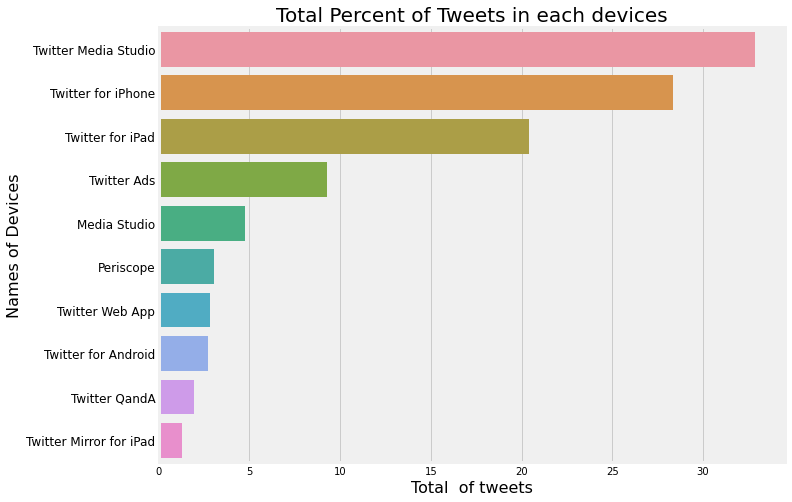

In [11]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=df_td_retweets.head(10).values, y=df_td_retweets.head(10).index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, color='black')
plt.xlabel('Total  of tweets', fontsize = 16, color='black')
plt.ylabel('Names of Devices', fontsize = 16, color='black')
plt.title('Total Percent of Tweets in each devices', fontsize = 20, color='black')
plt.show()

In [12]:
# Clean the tweet text.
# Create a function to clean the tweets.

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) # remove @mention
    text = re.sub(r'#','', text) # remove #symbol
    text = re.sub(r'RT[\s]+','', text) # remove RT
#     text = re.sub(r':+','', text) # remove :
#     text = re.sub(r'_+','', text) # remove _
    text = re.sub(r'https?:\/\/\S+','', text) # remove link like https
    return text

    

In [13]:
df['clean_text'] = df['text'].apply(cleanTxt)

In [14]:
df['clean_text']

0        Republicans and Democrats have both created ou...
1        I was thrilled to be back in the Great city of...
2        _Herridge: READ: Letter to surveillance court ...
3        The Unsolicited Mail In Ballot Scam is a major...
4        : Very friendly telling of events here about C...
                               ...                        
56566    : I don’t know why  thinks he can continue to ...
56567    : President  excels at communicating directly ...
56568    : LIVE: Presidential Debate Debates2020\n\nTex...
56569    Just signed an order to support the workers of...
56570    Suburban women want Safety &amp; Security. Joe...
Name: clean_text, Length: 56571, dtype: object

In [15]:
# create a function to get subjectivity.
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [16]:
# create a function to get polarity.
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
# # create two new columns.
df['subjectivity'] = df['clean_text'].apply(getSubjectivity)
df['polarity'] = df['clean_text'].apply(getPolarity)

In [18]:
df.head(10)

id                                               text  \
0    98455000000000000  Republicans and Democrats have both created ou...   
1  1234650000000000000  I was thrilled to be back in the Great city of...   
2  1218010000000000000  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1304880000000000000  The Unsolicited Mail In Ballot Scam is a major...   
4  1218160000000000000  RT @MZHemingway: Very friendly telling of even...   
5  1217960000000000000  RT @WhiteHouse: President @realDonaldTrump ann...   
6  1223640000000000000  Getting a little exercise this morning! https:...   
7  1319500000000000000                            https://t.co/4qwCKQOiOw   
8  1319500000000000000                            https://t.co/VlEu8yyovv   
9  1319500000000000000                            https://t.co/z5CRqHO8vg   

               device  favorites  retweets             date  \
0           TweetDeck         49       255   8/2/2011 18:07   
1  Twitter for iPhone      73748     17404    3/3/2020 1:34   
2  Twitter for iPhone          0      7396   1/17/2020 3:22   
3  Twitter for iPhone      80527     23502  9/12/2020 20:10   
4  Twitter for iPhone          0      9081  1/17/2020 13:13   
5  Twitter for iPhone          0     25048   1/17/2020 0:11   
6  Twitter for iPhone     285863     30209   2/1/2020 16:14   
7  Twitter for iPhone     130822     19127  10/23/2020 4:52   
8  Twitter for iPhone     153446     20275  10/23/2020 4:46   
9  Twitter for iPhone     102150     14815  10/23/2020 4:46   

                                          clean_text  subjectivity  polarity  
0  Republicans and Democrats have both created ou...      0.200000  0.200000  
1  I was thrilled to be back in the Great city of...      0.483333  0.458929  
2  _Herridge: READ: Letter to surveillance court ...      0.300000  0.050000  
3  The Unsolicited Mail In Ballot Scam is a major...      0.454762  0.021131  
4  : Very friendly telling of events here about C...      0.500000  0.268750  
5  : President  announced historic steps to prote...      0.200794  0.095238  
6           Getting a little exercise this morning!       0.500000 -0.234375  
7                                                         0.000000  0.000000  
8                                                         0.000000  0.000000  
9                                                         0.000000  0.000000

In [19]:
# # Plot the word cloud.
# all_word = ' '.join([tweet for tweet in df['clean_text']])
# word_cloud = WordCloud(width = 800, height = 400, random_state = 42, max_font_size = 120).generate(all_word)

# # visualize the graph.
# plt.figure(figsize=(15,10))
# plt.imshow(word_cloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

In [20]:
# create a function to compute the negative , neutral and positive tweet analysis.
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [21]:
# create a new column for tweet analysis.
df['analysis'] = df['polarity'].apply(getAnalysis)
df.head(10)

id                                               text  \
0    98455000000000000  Republicans and Democrats have both created ou...   
1  1234650000000000000  I was thrilled to be back in the Great city of...   
2  1218010000000000000  RT @CBS_Herridge: READ: Letter to surveillance...   
3  1304880000000000000  The Unsolicited Mail In Ballot Scam is a major...   
4  1218160000000000000  RT @MZHemingway: Very friendly telling of even...   
5  1217960000000000000  RT @WhiteHouse: President @realDonaldTrump ann...   
6  1223640000000000000  Getting a little exercise this morning! https:...   
7  1319500000000000000                            https://t.co/4qwCKQOiOw   
8  1319500000000000000                            https://t.co/VlEu8yyovv   
9  1319500000000000000                            https://t.co/z5CRqHO8vg   

               device  favorites  retweets             date  \
0           TweetDeck         49       255   8/2/2011 18:07   
1  Twitter for iPhone      73748     17404    3/3/2020 1:34   
2  Twitter for iPhone          0      7396   1/17/2020 3:22   
3  Twitter for iPhone      80527     23502  9/12/2020 20:10   
4  Twitter for iPhone          0      9081  1/17/2020 13:13   
5  Twitter for iPhone          0     25048   1/17/2020 0:11   
6  Twitter for iPhone     285863     30209   2/1/2020 16:14   
7  Twitter for iPhone     130822     19127  10/23/2020 4:52   
8  Twitter for iPhone     153446     20275  10/23/2020 4:46   
9  Twitter for iPhone     102150     14815  10/23/2020 4:46   

                                          clean_text  subjectivity  polarity  \
0  Republicans and Democrats have both created ou...      0.200000  0.200000   
1  I was thrilled to be back in the Great city of...      0.483333  0.458929   
2  _Herridge: READ: Letter to surveillance court ...      0.300000  0.050000   
3  The Unsolicited Mail In Ballot Scam is a major...      0.454762  0.021131   
4  : Very friendly telling of events here about C...      0.500000  0.268750   
5  : President  announced historic steps to prote...      0.200794  0.095238   
6           Getting a little exercise this morning!       0.500000 -0.234375   
7                                                         0.000000  0.000000   
8                                                         0.000000  0.000000   
9                                                         0.000000  0.000000   

   analysis  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  
5  positive  
6  negative  
7   neutral  
8   neutral  
9   neutral

In [22]:
# print all the positive analysis.
j = 1
sortedDF = df.sort_values(by = ['polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['analysis'][i] == 'positive'):
        print(str(j) + ') '+ sortedDF['clean_text'][i])
        print()
        j = j+1

1) Republicans and Democrats have both created our economic problems.

2) I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! KAG2020 

3) _Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…

4) The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp;  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!

5) : Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those articles and tho…

6) : President  announced historic steps to protect the Constitutional right to pray in public schools! 



897) : My new analysis in  with , "Don't believe the polls — Trump is winning." TrumpIsLosing Trump…

898) : “Let’s Make America Great Again and re-elect our fantastic president!” - 

899) Thank you Paris. Keep up the GREAT work! 

900) Congratulations, the Moderna vaccine is now available!

901) Peter Navarro releases 36-page report alleging election fraud 'more than sufficient' to swing victory to Trump  A great report by Peter. Statistically impossible to have lost the 2020 Election. Big protest in D.C. on January 6th. Be there, will be wild!

902) : Virginia’s voter registration system reportedly having problems on the last day to register to vote, with early voting in full…

903) “The Radical Left is trying hard to undermine the Christopher Columbus legacy. A great Italian opened new chapter in history of humanity by discovering the Americas”.    Not on my watch!

904) Actually, Tony’s pitching arm is far more accurate than his prognostications. “No problem, no masks”. WHO no long

Thank you to the millions of supporters in ARKANSAS, COLORADO, MINNE…

1564) ., who called me, tears flowing, to thank me for rolling out the maximum “Red Carpet” for the funeral of her husband, then voted against me on the partisan Impeachmen Hoax, said “everybody (Dems) wants to get out of town. This has been, in my whole career, one of...

1565) ...alone attracted 6.2 million viewers for the president’s briefing — an astounding number for a 6 p.m. cable broadcast, more akin to the viewership for a popular prime-time sitcom...

1566) ....BUT THE BEST IS YET TO COME!

1567) ...On Monday, nearly 12.2 million people watched Mr. Trump’s briefing on CNN, Fox News and MSNBC, according to Nielsen — ‘Monday Night Football’ numbers. Millions more are watching on ABC, CBS, NBC and online streaming sites, and the audience is expanding. On Monday, Fox News...

1568) The BEST decision made was the toughest of them all - which saved many lives. Our VERY early decision to stop travel to and from ce



2280) Rasmussen was one of the most accurate polls in 2016. Actually, I think, based on Crowds and Enthusiasm (of which Sleepy Joe has none!), that we are MUCH higher than 51%. The only thing Joe can count on is that a Federal Judge doesn’t eviscerate the Fake Ballot Rigging Scam!

2281) :  PelosiTantrum
A speech that
•Honored so many Americans
•Celebrated a strong US economy
•Seeks to continue l…

2282) : The NBA has suspended the season "until further notice” after a Utah Jazz player preliminarily tested positive for coro…

2283) : Watching Trump’s town hall on Fox News.
After seeing so much of the Democrat clowns stumbling, bumbling, evading and pand…

2284) : Love this  👏👏👏

2285) : Horowitz says IG did not dig into why FBI New York Field Office opened counterintelligence investigation on Carter Page in...

2286) : Dem HI Rep Gabbard on her “present” vote on impeachment: I could not in good conscience vote for impeachment because remov...

2287) : 1. Nancy Pelosi was apparently a

2896) : The hand-wringing over a Barr-Durham October Surprise is pretty rich given all the political damage that the debunked coll…

2897) We love Australia! 

2898) : Every word Pompeo said is true.

2899) ....Today,  and I encourage all Americans to cherish and honor the memory of those we have lost through acts of love and service. We will hold Parkland forever in our hearts.

2900) It has been two years since the tragedy in Parkland. We will always mourn the innocent lives taken from us – 14 wonderful students and 3 terrific educators. Earlier this week, I met with families whose experiences from that horrible day still piece the soul....

2901) True! 

2902) Big news for , Colorado! $60.7M proposed to  from  for improvements and enhanced safety to the Vail Pass on I-70, between miles 180-190. HUGE for safe travel through the region!

2903) : The recent jobs report is proof that under  &amp; Republicans’ leadership the American people are seeing real r…

2904) Bernie Sanders is OUT


3737) : Great!  Appeals Court Upholds Justice Departments Request To Drop Criminal Case Against General Michael Flynn!

3738) The National Guard has been released in Minneapolis to do the job that the Democrat Mayor couldn’t do. Should have been used 2 days ago &amp; there would not have been damage &amp; Police Headquarters would not have been taken over &amp; ruined. Great job by the National Guard. No games!

3739) A proposal by Pentagon officials to slash Military Healthcare by $2.2 billion dollars has been firmly and totally rejected by me. We will do nothing to hurt our great Military professionals &amp; heroes as long as I am your President. Thank you!

3740) Our Testing is the BEST in the World, by FAR! Numbers are coming down in most parts of our Country, which wants to open and get going again. It is happening, safely!

3741) “How Trump Is Making Black America Great Again, The Untold Story Of Black Advancement in the Era of Trump.” By Horace Cooper  A great new book!

3742) 


4278) Schiff must release the IG report, without changes or tampering, which is said to be yet further exoneration of the Impeachment Hoax. He refuses to give it. Does it link him to Whistleblower? Why is he so adamant?

4279) : 'Reliable Sources' host blames 'radicalization' in the U.S. that has led to 'media bashing that is absolutely unprecedented'…

4280) Congressman Greg Pence () is doing a phenomenal job for Indiana. His brother, our great Vice President Mike Pence, and I need Greg to help us keep our Country SAFE and fight for our MAGA agenda. Greg has my Complete &amp; Total Endorsement! IN06 

4281) Congressman Jim Banks (_banks) is a fighter for Indiana! A highly respected Navy Officer, Jim works hard for our Vets and Small Businesses. Strongly supports the Second Amendment and our Border Wall! Jim has my Complete and Total Endorsement! IN03 

4282) I am proud to announce that  will receive $1.4B in CARES Act funding to assist in their continued operations and to keep people

5147) Great conversation with President Lenin Moreno of the Republic if Equador. We will be sending them desperately needed Ventilators, of which we have recently manufactured many, and helping them in other ways. They are fighting hard against CoronaVirus!

5148) Really good polling numbers as people realize all that we have done. Rasmussen Approval Rating, just out, 52%. Approval Rating in the Republican Party, 96%. Thank you!

5149) : Chairman : “Our bill is the right medicine for our roads &amp; our economy. It will help rural communities, it will…

5150) Starting to get VERY high marks in our handling of the Coronavirus (China Virus), especially when compared to other countries and areas of the world. Now the Vaccines (Plus) are coming, and fast!

5151) Gallup Poll numbers on the handling of this situation are outstanding, the best. Thank you! 

5152) : For too long, the Clean Water Act has been abused and used to delay important energy infrastructure projects. 's impor…

5153) I 

5848) The Radical Left fools in Portland don’t want any help from real Law Enforcement which we will provide instantaneously. Vote! 

5849) Today we celebrated the passage of landmark legislation that will preserve America’s majestic natural wonders, priceless historic treasures, grand national monuments, and glorious national parks. It was my great honor to sign the Great American Outdoors Act into law! HR1957 

5850) I am deeply saddened by the tragic loss of eight Marines and one Sailor during a training exercise off the coast of California. Our prayers are with their families. I thank them for the brave service their loved ones gave to our Nation. SemperFidelis

5851)    I agree--and thanks.

5852) _jensen  Thanks!

5853) : Historic Presidency:  joins Lou for an exclusive interview to discuss how he’s accomplishing so much despite…

5854) : . explains one major difference between President Trump and Joe Biden: Unlike Biden the "political parasite", Trump…

5855) See you in Sanford,

6561)   Larry, thank you and keep up the great work!

6562)   Thanks Wendy.

6563)  Thanks, it will be great.

6564)   Thanks.

6565) Great defense by the  this weekend—congratulations to —only 6 points allowed!

6566) Just won the highest rated sanitary award in NY—an A--&amp, the food is great also. Trump Grill/ 57th &amp, 5th.

6567) Just completed purchase of magnificent Ritz Carlton in Jupiter, Florida. Will be renamed Trump National Golf Club &amp, be tremendous success.

6568) . Interesting and thanks.

6569)   Logan: You are wrong on this-- is a tough &amp, talented guy--&amp, very loyal--a rarity in life.

6570) Comic  bombed at University of Texas at Arlington—crowd was dismal as was his performance—I told you so!

6571)   True!

6572) I take great pride watching skaters enjoy the TRUMP Rink in Central Park from my office--world's best skating rink 

6573)  Happy Birthday and best wishes.

6574) . shines in the record 13th season of ‘All Star’ .  The Baldwin clan will be prou

7227) Brits spent $57.8M on the royal family. Obamas cost us $1.4B in expenses--including entertainment  Living large on us.

7228) It's amazing how different all of the polling results are--not an exact science.

7229) """To be successful your focus has to be broad enough to think big at the same time."" --'Midas Touch' with "

7230) My successful acquisition of the Kluge estate was a fantastic deal which is already being studied in business schools.

7231)  Wishing you good luck and a happy birthday.

7232) The  is currently going on--and is one of the truly great sporting events.

7233) Watch this video for a look at our great course in Los Angeles--- Rancho Palos Verdes-- 

7234) .  You are terrific (always). Great job on the Apprentice.

7235) Iraq was one of our biggest mistakes. We got absolutely nothing for our sacrifices.The country will collapse (cont) 

7236) """Having a vision for something can be a very powerful force for accomplishment.""--Midas Touch"

7237) Are you a yo


7837) sweepstweet _giudice definitely fell under 's negotiation skills—an important business tool.

7838) sweepstweet  wins $100,000 for her charity and that’s a nice gift.

7839) Good move by Aubrey to be the red-headed model they didn’t have. sweepstweet

7840) It’s clear to me that _giudice needs some lessons in negotiation sweepstweet

7841) Could be a fight over red-heads with —this could be good. sweepstweet

7842) I will be live tweeting during tonight's CelebrityApprentice 9 PM ET 

7843) This Sunday's  will shock you! Big Development...Be sure to tune in on  this Sunday at 9PM EST!

7844) With today's struggling job numbers, it is clear that there is one choice this November.  can turn the economy around.

7845) Welcome to the  recovery--the labor force participation rate is at a NEW 30 year low of 64.3%  

7846) Mariano Rivera, Yankee pitcher, is the greatest ever. Get well fast.

7847) Derek Jeter is playing phenomenal baseball. He is a total winner--and also a great guy. 


8330) When  defended Obama on Benghazi in the presidential debate, she was defending a complete lie 

8331) Congrats to Pres.Obama on having 3 of 's “biggest Pinocchios of the year”   Great accomplishment!

8332) No better place to celebrate New Year’s Eve than , the most elite hotel in downtown NYC 

8333) Prime Minister _Cameron is very foolish in giving  so much money to build wind turbines which r destroying Scotland.

8334) _nugent  Good luck on your real estate test - you will be the biggest star of all!

8335) Wow, a really great review of my golf club in Scotland, , in todaysgolferco.uk. Thank you! 

8336) Wow, just in-John Beale, the top person in government on climate change (EPA), is a total fraud, and just admitted it! What can they say now

8337) """:  firefightersfordonald You make what I do worth while. I'm holding faith you will run for any office. Thanks Brent!"

8338) """: We had a great exchange on Twitter re: you being snubbed for  person of the year,. Time=no guts!

9226) Soon to be the greatest hotel in U.S. don_trump_jr     OldPostOffice 

9227) Press conference at The Old Post Office in D.C. 

9228) """:  you are my role model i want to be like you in my own original way. inspiration""  Thanks!"

9229) """:  who is your favourite celebrity Apprentice winner?""  I have many!"

9230) This George Zimmerman is really a mess - he really has to just disappear! (He attacked his wife last night).

9231) """:  should be elected for president of the world. The man speak great sense about world problems!! leader"""

9232)  Arsenio, may your run be long, successful and important-just be yourself and you will be a smash! Good luck.

9233) I'll be going to the Old Post Office Building on Pennsylvania Avenue in D.C. today. Will create one of world's great hotels. Lots of jobs!

9234) """: “:  Syria is a complex and dynamic situation. No one would expect you to comprehend it.” Nor Obama! So true"

9235) """:  How old were you when you decided what you wanted t

9862) """_The_Twit:  When will Dubai be complete?"" Under construction now-completion in two years!"

9863) """:  Cant wait for tourney next March, always good to have you on with  before big tournament"""

9864) """_Harris24:  Can't wait to visit this location one day! Keep up the great work Mr. Trump!""  Thanks!"

9865) The 250 million dollar construction of Trump Nationsl Doral is coming along great. Just left Miami where I toured entire project.AMAZING!

9866) """: "": Biggest name in real estate! "" ICON!""Thanks!"

9867) Getting ready to leave  and the brand new Blue Monster course--it's unbelievable!

9868) In beautiful Miami inspecting the progress of ’s $250 million conversion into the country's 1 resort.

9869) Don't ever think you've done it all already or that you've done your best. That's a shortcut to undermining your own potential.

9870) "   "" also new products. they are going back to the pre steve jobs days."" And I have stock"

9871)   True!

9872) "   "" reading The

10388) . Skywire As much credit as he's been given, he wasn’t given enough credit for his incredible feat over Grand Canyon.

10389) We need to worry about the American worker first!

10390) Unions who secure the border oppose the amnesty bill  Their expert opinions should at least be listened to.

10391) Becoming a US citizen is not a right, it’s a privilege.

10392)  That's really nice--good luck!

10393)  Thanks.

10394)   Great!

10395)  Much better, enjoy it!

10396) """:   Played Trump Golf Links Scotland last week - by far the best course in the world!! Thank you."

10397) “Some events will wipe out one person but will make another even more tenacious.” – Think Like a Champion

10398) Our debt is about to top $17T. ObamaCare and China (&amp, others) are killing American business.

10399) We are being embarrassed by Russia and China on Snowden (and much more) yet Obama is talking about global warming on Tuesday.

10400) Excited and honored to be addressing  summit in Iowa this Au

10892) 32º in New York - it's freezing! Where the hell is global warming when you need it?

10893) """:  it's great to have u in the game of golf, ur courses r all great, first class operations in great condition"""

10894) . once again made it to the Final Four. A true talent and great friend to CelebApprentice . Great job!

10895) . did amazing on CelebApprentice .  Raising over $505K for , she made it to the Final Four.  Congrats Lisa.

10896) “Never judge someone by their job title. You’d be surprised at the talents people can have.” – Midas Touch

10897) Enjoy Celebrity Apprentice tonight at 9 - a really great episode!

10898)  GREAT playing, you are the best!

10899)   Have fun 1.

10900) """: Best part of my Monday morning commute  on ""  Thanks David!"

10901) I AM PLEASED TO INFORM YOU THAT CELEBRITY APPRENTICE HAS BEEN RENEWED FOR ANOTHER SEASON BY NBC. SEE YOU AT THE NBC UPFRONTS TOMORROW.

10902) """:  What are your thoughts on Sergio?""  A great guy!"

10903) """:  hows th

11565) .’s judgment wasn’t the best in who she chose to come back to the boardroom—that was her demise. CelebApprentice

11566) I hope everyone, or rather almost everyone, had a GREAT EASTER! We need our leaders to make great and wise decisions in these troubled times

11567) BIG NIGHT on Celebrity Apprentice tonight. IMPORTANT, starts at 10 P.M. as scheduled but NBC just increased all future episodes to 2 hours!

11568) Have a GREAT EASTER, I love you all!

11569) Major article in New York Times today discusses the cost of environmental damage in China and how it is RAPIDLY GROWNG! Rest of World pays.

11570) China is the biggest environmental polluter in the World, by far. They do nothing to clean up their factories and laugh at our stupidity!

11571) We have tremendous economic power over China if our leaders knew how to use it, which they don't! China's economy would collapse without us.

11572) """: why is  not the president of the US right now?!"" A very good question!"

11573) "

12167) The ruling  consultant class of losers like  have no respect for the Tea Party.  They do this at their own peril!

12168) . Thanks Sandy.

12169) Just a few more days until the 13th season of All-Star  premieres.  Be sure to tune in this Sunday at 9PM on . Big!

12170) Country music star  returns to All-Star .  Competing for , Trace is great!

12171) I will be on  tonight.  Always have a good time with .  Now we know he will get high ratings tonight.

12172) ... and pay per view records with “Battle of the Billionaires” in Detroit. It was a wild day!

12173) It is a great honor for me to be inducted into the  Hall of Fame. This will take place on April 6...

12174) Thanks Go Angelo, people are now really aware of my ties, shirts, and cuff links at Macy's-

12175) ".....you keep forgetting to mention the fragrance, ""Success""!"

12176) A certain whack job, Go Angelo, who doesn't have a life- spends his time hopelessly attacking me re: Macy's....

12177) ..... I wonder if Angelo 

13138) """:  he was thé Very First one to warn people about Barack Hussein Obama &amp, people blamed him? Well, he was right!"""

13139) """:  is so right with everything he is saying run... Please run for president"""

13140) Isn't it interesting that immediately after September 11th, everybody was asking for, and indeed demanding, torture of any kind. No reports!

13141) """: : Donald, I am in love and admire you! Run for president in 2016 and all will be well!"""

13142) The terrorists cut off the heads of Americans and laugh, then want to sell us the bodies for $1,000,000. We fight over sleep deprivation!

13143) """:  Congrats on  ! DonaldTrump must be proud ! Sharknado"" Way to go , you are a winner!"

13144) """:  love how you speak your mind""  Well, somebody has to!"

13145) “Trump, Tiger Team Up to Create 'Stunning' Golf Course in Dubai”   via _Media by 

13146) TBT My confirmation picture at First Presbyterian Church in Jamaica, NY. 

13147) Congress’ greatest card against O


13771) """: Sometimes your best investments are the ones you don't make. ~ Donald Trump"""

13772) Congratulations to _Bossie &amp, his team _United on their important court win for the First Amendment! 

13773) Looking forward to returning to the Hawkeye state this Saturday to support my friend and strong Conservative !

13774) Via ’s Steve King for Congress Facebook Page: “Donald Trump has a special announcement!”  

13775) Lightweight  is driving business &amp, jobs out of NY. Only wants self publicity—a total loser!

13776) John  is one of the most respected people in politics. Dopey  is one of the least respected!

13777) Alison Grimes will protect the 'sanctity' of her Obama ballot yet admits she voted for Hillary in primary. Hypocrite. Vote _Mitch!

13778) If you want more, you have to require more from yourself. -- Dr. Phil McGraw

13779) """   his books are great"" Thanks."

13780) """_Jay_Sea: We need DonaldTrump in the White House in 2016. Someone w/o political agenda &amp,

14430) Youth unemployment is at a record high. ObamaCare is a job destroyer which is ruining aspiring careers. It must be repealed.

14431) Watch – Obama will not fix the illegal immigrant loophole. Instead he will sign another executive action giving more amnesty.

14432) Located in the beautiful countryside of Mooresville, _Charlotte has a superb clubhouse &amp, top amenities 

14433) Along with two championship courses on the Potomac River, ’s also offers limitless social events  

14434) """_one  I just finished reading your book ""Think Like A Champion"". Great stuff. Positive thoughts, positive actions."" Thank you."

14435) “Be ready for problems-you’ll have them every day. Keep your focus and be as big as your daily challenges.” – Trump Never Give Up

14436) """  staff at Trump Doral was amazing. Made my visit wonderful. Blue course is awesome. Doral as it should be"" Great, thanks."

14437) The ultimate Golf experience,  is a unique destination located on the beautiful Ayrshir

15054) """_j_roth: ""I was never one who looked at success as bad. For me, success was always good. I loved it, and still do.""  Donald Trump"

15055) """:  Loving the new TRUMP sign going up in Chicago!"" Thank you!"

15056) """: If Donald Trump runs in 2016, I will donate my time to campaign for him. Trump For President!!! We need great leadership!"""

15057) """_kordish: donaldtrump for president! ""  Thanks!"

15058) "“The best luck of all is the luck you make for yourself.” – General Douglas MacArthur"""""

15059) """: Run Donald Run! We need strong, decisive leader who'll make timely decisions, move policy forward &amp, return US 2 prosperity."""

15060) """: This is my nephew Mr trump,he is having chemo again,can you look at this and send a message maybe""  Tyler, get well soon - WIN!"

15061) """:  _Toronto   Flights cancelled. One quick call to Trump Toronto &amp, I was all looked after"""

15062) .  Thanks M, you are doing a great job at Trump Toronto!

15063) """: You have t

15845) """:  Then you should run for president! I know you could turn this country around.""  I definitely could (fast)"

15846) """:   Windmills in western NY State are a complete eyesore. Beautiful views ruined by propellers."""

15847) It's almost like the United States has no President - we are a rudderless ship heading for a major disaster. Good luck everyone!

15848) """:  hey. You are so cool and I'm voting for you in 2016""  Very nice!"

15849)       Thanks Dan

15850) Re Negotiation: Know what you want &amp, think about what the other side wants. Know where they’re coming from &amp, do not underestimate them.

15851) The Donald J. Trump Signature Collection's new line is out  --ties, shirts, accessories -- great &amp, going fast! 

15852) Business is an art in itself &amp, powerful negotiation skills are one of the techniques necessary to facilitate success.- Think Like a Champion

15853) """     man DJ! You are such an inspiration brother. Thanks for being you!"" Thank you."


16412) """: The Most Influential U.S. Gymnasts Of All Time:    _3""   Fantastic Shawn"

16413) """:    I get pissed off every time I see his ads on Fox. Waste of money! Go Trump!""  Many do!"

16414) """:  Veterans Love Trump"" But I love the VETS even more!"

16415) . has spent  $63,000,000 and is at the bottom of the polls. I have spent almost nothing and am at the top. WIN!  

16416) A GREAT day in South Carolina. Record crowd and fantastic enthusiasm. This is now a movement to MAKE AMERICA GREAT AGAIN!

16417) A lovely letter from the daughter of the late great John Wayne. Our country could use a John Wayne right now. 

16418) Great poll- thank you Nevada!MakeAmericaGreatAgain Trump2016 

16419) I'm going to be live with  and  to ring in the New Year 2016. Everybody should tune in to  tomorrow night!

16420) I never thought I'd be saying this but I've really enjoyed   on television lately, and he was terrific hosting 

16421) """:    Good morning, Mr. Trump. You're so AWESOME. Trum

17034) """: . He is a common sense powerhouse that gets things done! Excellent book! 

17035) """: DONALD TRUMP FULL INTERVIEW: Fox and Friends (11-03-15)   MakeAmericaGreatAgain Trump2016"""

17036) I will be on  tonight at 10pmE talking about my new book CrippledAmerica and much more! MakeAmericaGreatAgain Trump2016

17037) """:   Trump is the only one who can make America great again. Carson's sleepy, Jeb low energy."""

17038) """_org:  Your performances in every state have been amazing! MakeAmericaGreatAgain"

17039) """:  I Trust  's polls They are actually really Fair and really balanced on all their news"" Iowa lead!"

17040) Join me today, Nov 3rd, in TrumpTowerNYC at noon. I'll be signing copies of my new book CRIPPLED AMERICA. Don't miss it!

17041) """: BREAKING: Latest poll of Florida voters shows enormous lead for Trump! He'd beat Hillary!  tcot"""

17042) I will be interviewed on  at 7:00 A.M. and  at 7:50. Talking about my new book, out today, Crippled America.

17043) 

17725) "Very low ratings radio host Hugh Hewitt asked me about Suleiman, Abu Bake al-Baghdad, Hassan Nasrallah and more - typical ""gotcha"" questions"

17726) So nice, thank you Laura.  

17727) I’ll be in Dallas at the American Airlines Center on Sept 14th at 6 PM.  Will be great to be back in Texas. 

17728) Will be on _Joe in 5 minutes - at 7:00. Enjoy!

17729) """: : is there something to learn from  success? Election2016"""

17730) """:    I love Donald Trump. For ONCE I feel like someone out there running actually cares about us."""

17731) LIVE on Periscope: Watch major press conference live from  now! MakeAmericaGreatAgain 

17732) Congratulations to Tom Brady on yet another great victory- Tom is my friend and a total winner!

17733) The deal with Iran will go down as one of the most incompetent ever made. The U.S. lost on virtually every point. We just don't win anymore!

17734) """: Obama left our American hostages in Iran. Trump2016 "" Sadly, so true!"

17735) ., I am in fi

18362) """: Establishment Government, Media, and Hollywood are killing America. MAKE AMERICA GREAT AGAIN ! "

18363) Addressing record crowd @ Madison County Iowa GOP Dinner. We can bring common sense to DC &amp, Make America Great Again! 

18364) A great article by  out the truth on Mexico, trade, the border &amp, illegals. Thank you  

18365) """_D2:  go get em!! How does it feel to be the ""next"" POTUS? Trump2016"" Thanks for the spirit!"

18366) """:   is the real deal! When was the last time we had someone with true conviction for US?"

18367) I'll be in Iowa tonight making a speech to a record setting crowd. The word is getting out, MAKE AMERICA GREAT AGAIN!

18368) The leader and negotiators representing Mexico are far smarter and more cunning than the leader and negotiators representing the U.S.!

18369) ".: Bill, you are really beginning to understand what is going on with ""Trump"" - actually, you always knew!"

18370) """: ""The greatest social program is a job"" -Donald Tr

19221) My  int. on simplifying the tax code, our incompetent leaders, Iran and making America great again 

19222) """If your actions inspire others to dream more, learn more, do more and become more, you are a leader."" – John Quincy Adams"

19223) We have a sacred duty to care for our vets and their families. Our Vets are owed full access to healthcare anytime &amp, anywhere!

19224) The top course on the west coast  overlooks Pacific Ocean &amp, offers a luxurious public golf experience 

19225) Looking forward to speaking at the  FITN Republican Leadership Summit on Saturday at 12PM! Let’s Make America Great Again!

19226) """_ag: Friendly Friday: Michael Jackson with Donald Trump. michael 

19227) """:  would pick the strongest cabinet in history if he was president.""  TRUE!"

19228) """: I would easily vote for  if he ran for president."""

19229) """_Foresta:  I'd think you make a great President but I would really miss TheApprentice. Been a fan since the beginning."""

19230) 


19888) """: ""What matters is where you want to go. Focus in the right direction!"" -- Donald  _WojuBeforeYouVote"

19889) """:  I'm saying..  really laid down the smack last night!! 😂 had to pick up my jaw! GhettoFabulous"

19890) """:    you were great!! Such a great team player!!!"""

19891) """:  Thank you for creating a real realitea! That actually helps charity! donaldforpresident classact"

19892) """:  I Loved ever minute! Never a dull moment on CelebrityApprentice"""

19893) """:  _Rivers   she was wonderful Melissa! Truly missed! Cherish your memories!❤️"""

19894) """:    Mother's looks and dad's smarts: she'll go far.""  True."

19895) """:  _Rivers   Thank you for always treating her with love and respect"""

19896) """:   _Rivers   It was very touching to see her! Miss her dearly"""

19897) """:    LOL I remember those episodes...priceless"""

19898) """: West Coast, get ready!  truly delivers on two amazing hours of television tonight!  """

19899) """:  this is the bes


20612) State Treasurer John Kennedy is my choice for US Senator from Louisiana. Early voting today, election next Saturday.

20613) """: Can’t wait to get back out there and mix it up with the boys. –TW heroworldchallenge"" Great to have you back Tiger - Special!"

20614) Interesting how the U.S. sells Taiwan billions of dollars of military equipment but I should not accept a congratulatory call.

20615) The President of Taiwan CALLED ME today to wish me congratulations on winning the Presidency. Thank you!

20616) Thank you Ohio! Together, we made history – and now, the real work begins. America will start winning again!... 

20617) Getting ready to leave for the Great State of Indiana and meet the hard working and wonderful people of Carrier A.C.

20618) Look forward to going to Indiana tomorrow in order to be with the great workers of Carrier. They will sell many air conditioners!

20619) : Great interview on  by  w/ Carrier employee- who has a message for PEOTUS  &amp, VPE...

206


21554) I can't believe that  would allow the very nice Jeffrey Lord to be savaged by a panel of seven Trump haters. 7 to 1 - Don't watch CNN!

21555) """:    That man is a pillar of strength and will be perfect as our next president"

21556) "Well, that is it. Well done Megyn --- and they all lived happily ever after! Now let us all see how ""THE MOVEMENT"" does in Oregon tonight!"

21557) """:  Amazing job"""

21558) """_Ttag:  Great interview! Happy you had a chance to show the other side of you. Never change, never forget you are our messenger!"""

21559) """: .  Best interview that I have ever seen."

21560) """:   Great interview Megyn"""

21561) """:     and we love you Diamond and Silk""  I do also!"

21562) """: Donald u have done a terrific job so far on the interview. Cannot wait until u r president MegynKellyPresents"

21563) """:   That's why he is so successful. He is driven to succeed""  True!"

21564) """: Lovely interview, Mr. Trump! "" Thanks."

21565) """:   Watched 

22338) Just landed in New Hampshire. Will be at the venue shortly. FITN

22339) Leaving now for New Hampshire. Big crowd- looking forward to it! FITN

22340) Cruz going down fast in recent polls- dropping like a rock. Lies never work!

22341) ": RUMSFELD: Trump ""has a touched a nerve in our country...in a way that most politicians have not been able to do."" - https:/..."

22342) I want to win for the people of this great country. The only people I will owe are the voters. Trump2016 Video: 

22343) """: Rubio isn't experienced enough to be Commander in Chief. Rubio is a carbon copy of Obama. We need a true leader Vote Trump"""

22344) """: WeAreBernie will be overtaken by WeWantTrump. We are superior and have more supporters. makeamericagreatagain trump."""

22345) """:   trump right again With_Cruz_you_lose! Nobody supports Canuck Cruz MakeAmericaGreatAgain  trump2016"

22346) """:   ... You are like Superman, everywhere! But I'm keeping up.  Great!"

22347) """:    Everyone B smart!

23168) Great coordination between agencies at all levels of government. Continuing rains and flash floods are being dealt with. Thousands rescued.

23169) A great book by a great guy, highly recommended! 

23170) Wonderful coordination between Federal, State and Local Governments in the Great State of Texas - TEAMWORK! Record setting rainfall.

23171) THANK YOU to all of the great volunteers helping out with HurricaneHarvey relief in Texas! 

23172) Closely monitoring HurricaneHarvey from Camp David. We are leaving nothing to chance. City, State and Federal Govs. working great together!

23173) . - got your message loud and clear. We have fantastic people on the ground, got there long before Harvey. So far, so good!

23174) You are doing a great job - the world is watching! Be safe. 

23175) : To ensure your safety ahead of Harvey heed warnings from local officials &amp, review important safety information. 

23176) I am pleased to inform you that I have just granted a full Pardon to 8

23886) At 9:00 P.M. , of all places, is doing a Special Report on my daughter, Ivanka. Considering it is CNN, can't imagine it will be great!

23887) Celebrate Martin Luther King Day and all of the many wonderful things that he stood for. Honor him for being the great man that he was!

23888) ". ""Outgoing CIA Chief, John Brennan, blasts Pres-Elect Trump on Russia threat. Does not fully understand."" Oh really, couldn't do..."

23889) For many years our country has been divided, angry and untrusting. Many say it will never change, the hatred is too deep. IT WILL CHANGE!!!!

23890) will only get higher. Car companies and others, if they want to do business in our country, have to start making things here again. WIN!

23891) The Democrats are most angry that so many Obama Democrats voted for me. With all of the jobs I am bringing back to our Nation, that number..

23892) Inauguration Day is turning out to be even bigger than expected. January 20th, Washington D.C. Have fun!

23893) "INTE

24697) Crazy Maxine Waters: “After we impeach Trump, we’ll go after Mike Pence. We’ll get him.”    Where are the Democrats coming from? The best Economy in the history of our country would totally collapse if they ever took control!

24698) “You know who’s at fault for this more than anyone else, Comey, because he leaked information and laundered it through a professor at Columbia Law School. Shame on that professor, and shame on Comey. He snuck the information to a law professor who collaborated with him in........

24699) The safety of American people is my absolute highest priority. Heed the directions of your State and Local Officials. Please be prepared, be careful and be SAFE!  

24700) Rudy Giuliani did a GREAT job as Mayor of NYC during the period of September 11th. His leadership, bravery and skill must never be forgotten. Rudy is a TRUE WARRIOR!

24701) “ERIC Holder could be running the Justice Department right now and it would be behaving no differently than it is.” 

24702)

25454) We are having very productive talks with North Korea about reinstating the Summit which, if it does happen, will likely remain in Singapore on the same date, June 12th., and, if necessary, will be extended beyond that date.

25455) Senator Schumer and Obama Administration let phone company ZTE flourish with no security checks. I closed it down then let it reopen with high level security guarantees, change of management and board, must purchase U.S. parts and pay a $1.3 Billion fine. Dems do nothing....

25456) Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”

25457) Chicago Police have every right to legally protest against the mayor and an administration that just won’t let them do their job. The killings are at a record pace and tough police work, wh


26215) : House Freedom Caucus Chairman  and Congressman  joined me to discuss the latest round of i...

26216) : Many stubborn facts destroy the Dems’ impeachment fairy tale. These top highlights remain key:-Pres Zelensky didn’t kno...

26217) _: Thank you  for putting American back to work.  Just think how much better it could be if Members of Cong...

26218) _: The House Judiciary Committee's fundamental choice. My latest op-ed just published in The Hill.   

26219) : “This Impeachment Subverts the Constitution: It’s nakedly political and procedurally defective, and so far there’s no pub...

26220) ": The ""whistleblower"" does not have a right to anonymity, at best he would be protected against retaliation in employment. A..."

26221) : Schultz: The best evidence in this case came out months ago: the call transcriptLIVE NOW on War Room: Impeachment w/ ...

26222) : If Adam Schiff were confident in his legal position, he’d want to put the case to a judge. Yet he seems desperate not 

26709) : Stepping out of Schiff’s dungeon for a quick update.Members and the thousands of constituents they represent have a...

26710) : President  just announced a major breakthrough toward achieving a better future for Syria and the Middle Ea...

26711) Thank you General Mazloum for your kind words and courage. Please extend my warmest regards to the Kurdish people. I look forward to seeing you soon. 

26712) Big success on the Turkey/Syria Border. Safe Zone created! Ceasefire has held and combat missions have ended. Kurds are safe and have worked very nicely with us. Captured ISIS prisoners secured. I will be making a statement at 11:00 A.M. from the White House. Thank you!

26713) ....feel EMPOWERED. There’s a movement happening on these campuses like I’ve never seen before. When you have 3000 students wanting to get into an event that couldn’t get in, that’s pretty remarkable!”   Turning Point USA   KEEP AMERICA GREAT!

26714) ....Order a couple of months ago saying that any scho

27384) ....Trade Agreement.”       Making great progress for our Farmers. Approved E-15, year round. Big additional list to be submitted and approved within two weeks. Will be even better for Ethanol, and we save our small refineries!

27385) “Brazil will allow more American Ethanol to enter the country without Tariffs, a decision that Brazilian mills are celebrating. The seemingly counter-intuitive reaction stems from the tone of ongoing negotiations between the South American nation and the U.S. for a....

27386) : Our great American workers are winning under President ! 🇺🇸 

27387) _Atlantic: For more local information on Dorian effects in the southeastern United States, please follow   ...

27388) ....The good news is that we are winning. Our real opponent is not the Democrats, or the dwindling number of Republicans that lost their way and got left behind, our primary opponent is the Fake News Media. In the history of our Country, they have never been so bad!

27389) ....swing stat

28072) More and more the Radical Left is using Commerce to hurt their “Enemy.” They put out the name of a store, brand or company, and ask their so-called followers not to do business there. They don’t care who gets hurt, but also don’t understand that two can play that game!

28073) ....to your favorite President, me! These people are vicious and totally crazed, but remember, there are far more great people (“Deplorables”) in this country, than bad. Do to them what they do to you. Fight for Bernie Marcus and Home Depot!

28074) A truly great, patriotic &amp, charitable man, Bernie Marcus, the co-founder of Home Depot who, at the age of 90, is coming under attack by the Radical Left Democrats with one of their often used weapons. They don’t want people to shop at those GREAT stores because he contributed....

28075) ....Why would Kentucky ever think of giving up the most powerful position in Congress, the Senate Majority Leader, for a freshman Senator with little power in what will hop

28600) The Fake News Washington Post, and even more Fake News New York Times, are writing stories that there is infighting with respect to my strong policy in the Middle East. There is no infighting whatsoever....

28601) Thank you Andrew - We all miss beautiful Meadow! 

28602) We stand firmly, strongly, and proudly with the incredible men and women of law enforcement. You do not hear it nearly enough, but Americans across this Country love you, support you, and respect you more than you could possibly know! PeaceOfficersMemorialDay 

28603) Thank you Joe and remember, the BRAIN is much sharper also! 

28604) : Very proud of  - he is going an amazing job!Trump Average Approval Ratings Skyrocket To Highest Point In Y...

28605) : Spare me? First you have never created a job in your life. Second, our great city has gone to shit under your leadership. Cr...

28606) The golden era of American energy is now underway! 

28607) With incredible grit, skill, and pride, the 7,000 workers here a

29197) : While  was successful in the private sector, career politicians enrich themselves by spending decades in...

29198) ....Scott has helped us to lower drug prices, get a record number of generic drugs approved and onto the market, and so many other things. He and his talents will be greatly missed!

29199) Just a few moments ago, I signed an EO addressing one of our nation’s most heartbreaking tragedies: VETERANS SUICIDE. To every Veteran—I want you to know that you have an entire nation of more than 300 million people behind you. You will NEVER be forgotten.

29200) Our great First Lady () will be doing a LIVE show TODAY at 1:00 PM PT with the terrific  at the  Resort. She’s on her BeBest Tour, helping address the OpioidCrisis. Free admission for the first 1,500 people!

29201) Republican Approval Rating just hit 93%. Sorry Haters! MAKE AMERICA GREAT AGAIN!

29202) The greatest overreach in the history of our Country. The Dems are obstructing justice and will not get anything d

In [23]:
# print all the positive analysis.
j = 1
sortedDF = df.sort_values(by = ['polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['analysis'][i] == 'neutral'):
        print(str(j) + ') '+ sortedDF['clean_text'][i])
        print()
        j = j+1

1) 

2) 

3) 

4) 

5) : 

6) Thank you Elise! 

7) As per your request, Joe...  

8) 

9) : I guarantee it was the 1st time millions of Americans learned the “kids in cages” was Obama not Trump because the medi…

10) Thank you Megyn! 

11) 11 DAYS! MAGA 

12) 

13) 

14) 

15) 

16) : I will be there. Historic day!

17) 

18) THANK YOU OHIO! VOTE 


19) : BLM-antifa thugs are running around and beating people on the streets in DC. Video by : 

20) : Developing: The DominionVotingSystems that "glitched" in favor of Joe Biden (and was used in 29 states), partnered up wit…

21) 

22) 

23) “We are not acting to thwart the Democratic process, we are acting to protect it.” 

24) 

25) 

26) 

27) 

28) Biden lied Pennsylvania! 

29) : Open the schools! I wonder where the “listen to the science” people will go when the science doesn’t support their fearmonger…

30) Thank you! 

31) :    Amen!  Not a lot of people understand what  has done!  It is truly amazin…

32) Heading to Georgia now. S


976) : HANNITY: Biden disrespects voters with court-packing dodge. Exclusive:  talks to Trump supporters in FL.…

977) : It’s Tuesday, October 13th 2020, and Barack Obama was the most corrupt President in US history.
Obamagate

978) : 

979) : Today's the day.

ConfirmACB 

980) : With just weeks to go until election day, Judge Amy Coney Barrett made her case for serving on our nation’s highest cour…

981) : What a pleasure to interview Jon Ponder!

982) : Dems keep claiming this doesn't happen.

983) : My POTUS ❤️  

984) : Sen Ron Johnson just released his report on Biden’s corruption with China, Ukraine, and Russia. Fox doesn’t report about i…

985) : California Mandates All Food Must Be Consumed Through IV To Ensure Masks Are Never Removed 

986) : The Commission on Presidential Debates is supposedly bipartisan w/ an equal number of Rs and Ds. I know all of the Republi…

987) : If a contractor took 47 years to build your construction project and it was still in need of repair, wou


1683) If you murder a police officer, you should receive the death penalty! 

1684) 

1685) : JUST IN: President Trump tells reporters he will restart MAGA rallies in Oklahoma, Arizona, Florida &amp; North Carolina

1686) : .⁦⁩ is coming to Colorado for an ⁦⁩ rally! 

Join us on Feb. 20th! ⬇️ 

1687) 

1688) : Karma

1689) 

1690) : Project Veritas Video: Antifa Chapter Head Admits Soros Funding, Association With Tom Steyer 👇


1691) 

1692) White House news conference at 5:00 P.M. Eastern. Thank you!

1693) : So when 2A activists legally open carry in VA or Mich, it's a natl story that every governor across the country knows abo…

1694) : Just announced: over $33 million in funding from the HHS has been released to NY21 hospitals. I will continue to work to…

1695) : Safeguarding our nation’s food supply is a critical component necessary to defeat the spread of coronavirus. I support th…

1696) Chicago‘s Fraternal Order of Police Endorses Donald Trump for Reelection  via 

1697) : Sw

2460) : Next stop for USMCA: the desk of President ! ✍️  

2461) : Brad  with  today: There is no Democrat that can compete with  and this economy 

2462) 

2463) China is drooling. They can’t believe this! 

2464) : Today  spoke with  about the impeachment charade. From the interview:  will come out stro…

2465) 

2466) The  has published guidelines on  to enable every American to respond to this epidemic and to protect themselves, their families and their communities.

2467) : President Obama is being quoted on Flynn, saying "There is no precedent that anybody can find for someone who has been…

2468) : 82% of Americans would see their taxes go up under the Joe Biden tax plan!

2469) 

2470) 

2471) 

2472) : Ivanka Trump: To those affected by Hurricane Laura, President Trump will support you every step of the way

RNC2020 https:/…

2473) 

2474) Tomorrow I have called for a National Day of Prayer. I will be tuning in to Pastor  at the  Church in Gainesville, Georgia at 11:00 AM EDT.


3142) 

3143) : To the heroes in the U.S. food supply chain, we salute you. 

3144) LAW &amp; ORDER!

3145) : 

3146) : Today marks 75 years since the Marine Corps launched an amphibious assault onto the island of Iwo Jima, beginning one of the bloo…

3147) 

3148) : MediaBuzz: Former NBC Staffer Emily Miller Describes Culture of Harassment at NBC  

3149) Thank you Nick! 

3150) 

3151) 

3152) : "This is a disgrace to mankind and a disgrace to the people of the United States of America. This is a crime: an impeachmen…

3153) : Can’t wait to be home. See you soon Bakersfield! KAG2020 🇺🇸 

3154) SAVE THE POST OFFICE!

3155) 96% APPROVAL RATING IN THE REPUBLICAN PARTY. THANK YOU! We will win against a tired, exhausted man, Sleepy Joe Biden, in November.

3156) Heading to Arizona, big rally and big crowd! MAGA KAG2020

3157) : "The death of George Floyd on the streets of Minneapolis was a grave tragedy. It should never have happened. It has filled…

3158) MN Gov. Walz: We Estimate 80% o

3903) 

3904) : Germany’s largest newspaper comes out swinging against China. This is a must watch for US journalists who seem intent o…

3905) 

3906) A total miscarriage of justice! 

3907) 

3908) 

3909) _:  "Our Justice system has to be impartial." -

RogerStone deserved an impartial jury. Pr…

3910) : In 2016, Americans elected  to the White House.

In 2018, Americans elected Republicans to hold the Senate M…

3911) Big show tonight on !  will be exposing Joe Biden’s Corruption at 8:00pmE — and of course, don’t miss  with  at 9:00pmE!

3912) 

3913) : “In responding to the outbreak of coronavirus across the country, every level of government has worked together. Reopenin…

3914) : USNS Mercy is underway.

Check out this infographic to learn about the capabilities of USNavy Hospital Ships, USNSComfort and…

3915) _08: Trey Gowdy to Intelligence Officials: 
Stop Briefing ‘Leaker’ Adam Schiff! 


3916) : ICYMI in the National Review → “History Is on the Side of Republicans Filling a


4641) : I find it extremely ironic that all of the people who said "Trump would destroy America" are the one's burning our cities…

4642) : What the radical left is doing to America has made me really sad this weekend.

I don't have much more to add besides th…

4643) : This is unreal. But it’s intentional 

Big liberal cities are trying to bait Trump into sending Feds across the country…

4644) : Trump has turned the Washington Post into The National Enquirer.

4645) Trump nominated for Nobel Peace Prize following Israel-UAE accord  via 

4646) Thank you Mark! 

4647) : President Donald Trump has been nominated for the 2021 Nobel Peace Prize.

He was nominated by Christian Tybring-Gjedde, a mem…

4648) : This is why Trump is sending in Federal troops — this is a Federal Court House the state of Oregon is refusing to protect in…

4649) 

4650) @_StephanieMyers: BREAKING 
President Trump is nominated for the Nobel Peace Prize for helping broker the peace agreement between Israe…

4651)

5347) Obama is totally “tweaking” the Republicans because he doesn’t respect them—they’ve got to change their ways.

5348) “Trump Brand Expands To South America: The Donald Lends His Name To Luxury Tower In Uruguay”  via 

5349) As I said on  this a.m., you have to give Obama credit—he won! ...

5350) ... The NY Daily Snooze totally lied and never even called my kids!

5351) Now that it’s almost over, I can’t believe that unions &amp, management couldn’t save Twinkies etc--&amp, management just got a $1.75M  bonus.

5352) France is losing its businesses and wealth rapidly and day by day.

5353) _11 Motivation is key, so is momentum.

5354) Team Trump with the recipients of our donations in the Rockaways.  Sandy 

5355) A clip from guest hosting  yesterday on  discussing Halle, Angus and Gen. Petraeus 

5356) “He who knows when he can fight and when he cannot, will be victorious.” -- Sun Tzu

5357) While Derek Jeter is training every day in the off season, reports come out that A-Rod is

5978) My  interview discussing my  fundraiser in Trump Int'l Hotel Las Vegas and the state of the (cont) 

5979) My  interview with  where I discuss 's 'birth certificate' and why  has low ratings 

5980) Everybody is raving about the Trump Home Mattress by . If you are looking for a mattress, go buy (cont) 

5981) I want to see 's college records to see how he listed his place of birth in the application.

5982) So  will attack 's career at Bain Capital but won't return donations from Bain executives 

5983) Unsustainable-  has increased total federal budget outlays by over 24% during his term  He loves debt.

5984) Now  has decided there are 5 million Palestinian refugees   He always goes against 's interest.

5985) In '08,  said that Bush adding $4T to the debt was unpatriotic.  has already added $6T.

5986) Dine With The Donald and Mitt:

5987) My _Media interview discussing OPEC, US gas resources,  and running a campaign against  

5988) """Do not go where the path may lead, go in


6610) """:  if we could afford it, would you support it?""  No,"

6611) """:  will you be running for president or is it all talk?""  Time will tell!"

6612) """:  if the people want to get our economy back on track, they’ll vote TRUMP in 2016""Thank you."

6613) """_DTrick:  i didnt vote for him but i cant wait till he's out of office... for President! 2016"""

6614) Don’t believe the manipulated job numbers. Walmart has just cut orders with suppliers because of rising inventory.

6615) Our country needs leadership now. There is total dysfunction in Washington.

6616) You have to believe in what you want. Keep your focus, keep your momentum--and remain patient and persistent.

6617) For all of those who have been asking about online sales, the Donald J. Trump Signature Collection ties &amp, shirts are sold .com

6618) """:  you need to renovate 1600 Pennsylvania ave. ASAP!!!!"""

6619) Both Obama administration and House leadership staffs are exempt from ObamaCare. Why not the Americ

7269) """:  @_BOSS_TALK_  Well, that explains why I have no desire to read that garbage!"""

7270) """:   A donor was found! James goes into the OR tonight for his second double lung transplant! hope"""

7271)    Yes.

7272) """@_BOSS_TALK_:    Read this garbage by  &amp, you'll see why sales WAY down-lost its way-sad!"

7273)    That's what I hear.

7274) “Never give up on yourself.” – Think Big

7275) “We have a system that increasingly taxes work and subsidizes nonwork.” - Milton Friedman

7276) """:  courage big boss""  Always!"

7277) In case you missed it, check out  story about  &amp,  

7278) Via ’s : “Trump researching 2016 run” 

7279)   Yes!

7280) We spend billions of dollars helping nations all over the World but with hurricane Sandy and Oklahoma tornado not one nation helped us!

7281) """:  Furthermore, as we continue to send our assets to foreigners we will become a 3rd world country.Must stop"

7282) """:  how come you don't like Alan sugar Donald?  Because he's a lowl


8306) """_upfield:  _puggi Run Donald, Run!"""

8307) Where’s the electability? Jeb is losing to HRC by 13 points. A Bush will never beat a Clinton. Wake up !

8308) """:   Mr. Trump, will you consider running for President? The country needs you."""

8309) """:  Johnny Damon talks  and working for .  celebapprentice"""

8310) """: “You're never a loser until you quit trying,” - Mike Ditka"""

8311) """:  What grade 1-10 you give to the reign of Gabriela Isler ??? Greetings from Brazil!  She gets a solid 10!"

8312) Via  by : “Donald Trump – To Micromanage or Not To Micromanage?” 

8313) Via : “ to open restaurant in Trump Int’l Washington, D.C.” 

8314) If you're going to be thinking, you may as well think big.

8315) """: This country needs  to run for president"""

8316) """: Wearing the  signature collection today lookgoodfeelgoodscangood"""

8317) """: No once respect is lost, it's gone forever, always suspicion in any relationship  """

8318) """:   Looking forward to his though


9111) Via  by : “Poll: Hispanics, Blacks Call for Tighter Borders, Access to Illegals' Jobs”  

9112) Via _news by : “: Giving back is a priority for me” 

9113) With the record $200M renovations on track &amp, budget (a miracle in DC), Trump Int’l Washington DC is being built into a national marvel.

9114) """:    - so talentless, what was he doing there?"""

9115) """:  Emmys are a joke. the donald needs to fix them like he did with the Miss Universe pageant."""

9116) _Media: “Donald Trump: ISIS 'Awakens the Lion' With Journalist Beheading” (includes  video)

9117) Obama sent weapons through Benghazi to ISIS yet he is holding up shipments to Israel. What is he thinking?

9118) Once the ISIS thug who beheaded Foley is identified 100%, he should be bunker busted to hell.

9119) I will be on  at 7.30 A.M.

9120) """:   THE DONALD SHOULD BE PRESIDENT"""

9121) """:  I would vote for you sir. Never again will I vote for a career politician like Obama. I did, twice. Regret it."""

9122) 

9765) Via : “ talks family and business” 

9766) """: i am now a big believer in  THINK BIG strategies...."""

9767) Afghanistan's so called leader, Karzai, is toying with the U.S.

9768) COUFINDS IN FAVOR OF TRUMP UNIVERSITY 

9769) Lightweight  just got his ass kicked by Trump!

9770) For information on Trump University victory, call Alan Garten, Esquire, at 212.836.3203 or Jeff Goldman, Esquire, at 212.867.4466.

9771) Wow--tremendous victory in the Trump University case against lightweight --just got the news!

9772) """                           Mr. Trump, it's commendable that you have over 2.5 million Follows....""  Thank you."

9773) Article from The Street--The Donald's Trump Card: Himself 

9774) Looking forward to being hosted by ’s Erie County Lincoln Leadership Reception tonight. Record crowd! Can't wait.

9775) Are Republicans suicidal? Now they want to push amnesty through Congress. Allowing Democrats into the country.

9776) """:  is our future. Only he can turn our cou

10387) """  Zogby is respected in the business of polling ~ the media is attempting to silence the message """

10388) AskTrump  

10389) .@_Just_Mads_ asktrump 

10390) . asktrump 

10391) . asktrump 

10392) ._Do_Good asktrump 

10393) . asktrump 

10394) ._Sunday asktrump 

10395) """_jane:   Fox is using you for ratings. They want u out of the race. Refuse."""

10396) """: On the Muslim issue: It might help  if he actually supported Christians religious liberty rights."

10397) """: On the Muslim issue: It might help  if he didn't take five years to visit Israel"""

10398) """:   I totally support you! You have this Ga. Girl's vote!!!"""

10399) The  refused to use their just in poll numbers where I have a massive lead but instead used  numbers where my lead is smaller.

10400) MakeAmericaGreatAgain Trump2016 

10401) On my way to Iowa. Will be landing in Des Moines in two hours. See ya!

10402) I’ve just released my position papers on The Second Amendment. 

10403) Thank you.  

1


11029) """:   trump2016 MakingAmericaGreatAgain"""

11030) Thank you Tennessee! Trump2016SuperTuesday

11031) Entrepreneurs: See yourself as victorious--look at the solution, not the problem.

11032) If any candidate believes that with what we know today we still should have invaded Iraq then they are unqualified to be Commander-in-Chief.

11033) """:  Waiting to hear you will run for President in 2016.""  Watch."

11034) """: 🇺🇸  

11035) """: Economically,DonaldTrump is what America needs.I dont know if he's running or not, but I'm voting Donald Trump for President"

11036) """:  I beg you to run"" Stay tuned!"

11037) """:   keep telling it like it truly is! God Bless You And Yours!!"""

11038) I will be interviewed on  at 7:00 A.M.

11039) """: Yes, this is our next president - Donald Trump. In 2016 election America vote DJT 

11040) Think BIG! You are going to be thinking anyway, so you might as well  think BIG!

11041) """: Is the White House Big Enough for Donald Trump? | RealC

11637) """:  always on point 👌👌 

11638) """: Two Canadian Coast Guard ships sent to rescue U.S. freighter stuck in ice. globalwarming?   

11639) """Donald Trump promises 'world-class' Crandon Park golf course""  via  by "

11640) "Via  by Bill Van Smith: "" reminisces amid honor at "" 

11641) """:   run baby run!!! We need you!"""

11642) Entrepreneurs: Winners see problems as just another way to prove themselves. Remember to focus on the solution--not the problem.

11643) Entrepreneurs: Difficulties, mistakes &amp, setbacks are an inevitable part of business &amp, life. Remember to keep your equilibrium intact.

11644) . will be featured on  this morning (now).

11645) """:  Your not fired ! your hired! TrumpForPresident"""

11646) """:  Please, Please, please run for President, I'm begging!!!!"""

11647) """_khalil7:  you got my vote for 2016! VoteForTrump"""

11648) """:    We are looking forward to welcoming you..."""

11649) """:  is the only candidate for president that can be


12304) I agree, - To all Americans, I see you &amp, I hear you. I am your voice. Vote to DrainTheSwamp w/ me on 11/8. 

12305) """Clinton Foundation’s Fundraisers Pressed Donors to Steer Business to Former President""

12306) 'WikiLeaks Drip-Drop Releases Prove One Thing: There's No Nov. 8 Deadline on Clinton's Dishonesty and Scandals'

12307) JOIN ME IN OHIO TOMORROW!Springfield-1pm: 

12308) REPEAL AND REPLACE OBAMACARE!

12309) Thank you Sanford, Florida. Get out &amp, VOTE TrumpPence16! ICYMI- watch this afternoons rally here:... 

12310) REPEAL AND REPLACE!!! ObamaCareInThreeWords

12311) Get your ballots in Colorado - I will see you soon -- and we will win!MakeAmericaGreatAgain 

12312) 'Obama Warned Of Rigged Elections In 2008.' Time to DrainTheSwamp 

12313) Obamacare is a disaster - as I've been saying from the beginning. Time to repeal &amp, replace! ObamacareFail 

12314) ObamacareFail 

12315) Obamacare is a disaster! Time to repeal &amp, replace! ObamacareFail 

12316) Ob

12883) Thank you Greensboro, North Carolina! Will be back soon! AmericaFirst 

12884) TONIGHT! NORTH CAROLINA: GEORGIA: NEVADA:

12885) Join me in Atlanta on Wednesday- at noon! Trump2016Tickets:  

12886) In my speech on protecting America I spoke about a temporary ban, which includes suspending immigration from nations tied to Islamic terror.

12887) TERRORISM, IMMIGRATION, AND NATIONAL SECURITY SPEECH- TRANSCRIPT:  

12888) Congratulations to the 2016 StanleyCup Champions, Pittsburgh !

12889) Is President Obama going to finally mention the words radical Islamic terrorism? If he doesn't he should immediately resign in disgrace!

12890) Join me on Tuesday- in Greensboro, North Carolina! Trump2016 AmericaFirst 

12891) Thank you Pittsburgh, Pennsylvania! Will be back soon! AmericaFirst 

12892) Thank you Tampa, Florida!AmericaFirst TrumpTrain 

12893) Thank you Richmond, Virginia! Trump2016 

12894) Thank you  Coalition! An honor joining you today- to discuss our shared values.RTM2016

13303) ": Nevada remember you can ""Vote and Go"" - walk in vote and walk out! Caucus locator:  TrumpLV https:/..."

13304) Join us in Sparks, Nevada today! NevadaCaucus VoteTrumpNV 

13305) THANK YOU LAS VEGAS, NEVADA!NevadaCaucus VoteTrumpNV 

13306) Thank you Vermont! VoteTrumpVT 

13307) Thank you Michigan! VoteTrumpMITrump 35%Kasich 17%Cruz 12%Rubio 12%Carson 9% Via: ARG

13308) Thank you for your endorsement ! BikersForTrump VoteTrumpNV Video:  

13309) """:    FLORIDIANS ARE UPSET BECAUSE RUBIO DID NOT DO WHAT HE PROMISED ONCE HE WAS ELECTED! VOTE TRUMP"""

13310) The reason that Ted Cruz lost the Evangelicals in S.C. is because he is a world class LIAR, and Evangelicals do not like liars!

13311) """: Nevada we are on our way! VoteTrumpNV Trump2016 Caucus locator:  

13312) : Nevada we are on our way! VoteTrumpNV Trump2016Caucus locator:  

13313) Thank you South Carolina!  

13314) A quote was read from a parody account last night on MSNBC re: Jeb.  

13315) The failing  Wall 

13969) 'Presidential Executive Order on the Establishment of Presidential Advisory Commission on Election Integrity'➡️... 

13970) 'Presidential Executive Order on Strengthening the Cybersecurity of Federal Networks and Critical Infrastructure'... 

13971) The Democrats should be ashamed. This is a disgrace!DrainTheSwamp 

13972) Dems have been complaining for months &amp, months about Dir. Comey. Now that he has been fired they PRETEND to be aggrieved. Phony hypocrites!

13973) caught, he cried like a baby and begged for forgiveness...and now he is judge &amp, jury. He should be the one who is investigated for his acts.

13974) _REPORT: 10 SCANDALS ON DIRECTOR'S WATCH... 

13975) _REPORT: MEXICO 2ND DEADLIEST COUNTRY, TOPS AFGHAN, IRAQ... 

13976) "Cryin' Chuck Schumer stated recently, ""I do not have confidence in him (James Comey) any longer."" Then acts so indignant.  draintheswamp"

13977) 'Manufacturing openings, hires rise to highest levels of the recovery'

13978) Biggest story

14534) I would rather take a political risk in pursuit of peace, than to risk peace in pursuit of politics. HELSINKI2018 

14535) Thank you Helsinki, Finland! 

14536) Joint Press Conference from Helsinki, Finland: 

14537) It was an honor to join you this morning. Thank you! 

14538) : Landed in Finland for helsinki2018 where  &amp, Prez Putin are set to discuss US/Russian relations. POTUS meeting is in...

14539) : “Asylum-Seeking Central American Discovered to Be MS-13 Gang Member” 

14540) : “MS-13 Gang Member Arrested Again After 4 Deportations” 

14541) : These Russian individuals did their work during the Obama years. Why didn’t Obama do something about it?  Because he t...

14542) The stories you heard about the 12 Russians yesterday took place during the Obama Administration, not the Trump Administration. Why didn’t they do something about it, especially when it was reported that President Obama was informed by the FBI in September, before the Election?

14543) ....Where is th

15250) : Jesse Watters nails Joe Bite Me and John Kerry in one MonologueTheFive 

15251) : I will be announcing the winners of the MAGACHALLENGE and inviting them to the  to meet with me and perfor...

15252) : 

15253) : An impactful day in Morocco, where we furthered all 3 pillars of WGDP 🇺🇸🇲🇦⬇️💫 Women Prospering in the Workforce 💫 Women...

15254) : THANK YOU! MAGA 

15255) “Mark Levin blasts Adam Schiff, claims 'the law is on the president's side' on Ukraine” 

15256) : Nadler says he is only concerned about the “appearance of an open mind,” admitting this impeachment process is pre-bake...

15257) _Jordan: Republicans only have til Saturday to request witnesses for ALL open hearings.- decides WHICH witnesses tes...

15258) 

15259) STATEMENT FROM PRESIDENT DONALD J. TRUMP 

15260) THANK YOU! MAGA 

15261) Read the Transcript!

15262) The degenerate Washington Post MADE UP the story about me asking Bill Barr to hold a news conference. Never happened, and there were no sources!

152

15709) : For 2.5 years we were told there was collusion, then obstruction, then it was a cover-up... rinse and repeat. Seems t...

15710) : After 3 years of relentless pursuit of - (not various Democratic candidates for ) wi...

15711) : The downright “giddy” media hoping for  impeachment should take 3 minutes and watch this before they count...

15712) : VP _pence: Democrats don't have an agenda, that's why they want to impeach  

15713) : Stop what you’re doing...WATCH us expose the FakeNews Media LIES about !They selectively deleted 500+ w...

15714) : Tune in tonight as I join ! 

15715) : When  became president, his sons stopped doing international business deals, when Joe Biden became VP, h...

15716) : Yikes! I guess the Dems no longer want to do anything about election interference. 

15717) : 

15718) : ...and even though she knew the transcript was going to be released today, Speaker Nancy Pelosi initiates an impeachment inquiry into...

15719) : cc: Everybody not the Ukrania

16342) : BIG:  authorizes AG Barr to declassify Spygate docs from all agencies!  Coming up! 

16343) : FBI refuses to search text messages under FOIA. Director Wray needs to step up and stop this stonewalling that protects corr...

16344) “PELOSI STAMMERS THROUGH NEWS CONFERENCE” 

16345) : Congrats ⁦⁩ on receiving the Internet Association’s 2019 Internet Freedom Award this evening. 

16346) The Democrats have become known as THE DO NOTHING PARTY!

16347) The Democrats are getting nothing done in Congress. All of their effort is about a Re-Do of the Mueller Report, which didn’t turn out the way they wanted. It is not possible for them to investigate and legislate at the same time. Their heart is not into Infrastructure, lower.....

16348) Democrats don’t want to fix the loopholes at the Border. They don’t want to do anything. Open Borders and crime!

16349) 

16350) ..BETWEEN RUSSIA AND THE TRUMP CAMPAIGN. Mr. McGahn can be forgiven for declining the honor of appearing in Mr. Nadler’s 

In [24]:
# print all the negative analysis.
j = 1
sortedDF = df.sort_values(by = ['polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['analysis'][i] == 'negative'):
        print(str(j) + ') '+ sortedDF['clean_text'][i])
        print()
        j = j+1

1) Getting a little exercise this morning! 

2) : Vindman's behavior is a scandal. He should be removed from the  White House ASAP to protect our foreign poli…

3) Nevada is turning out to be a cesspool of Fake Votes.  &amp;  are finding things that, when released, will be absolutely shocking!

4) Nobody is showing up for Obama’s hate laced speeches. 47 people! No energy, but still better than Joe!

5) Pennsylvania prevented us from watching much of the Ballot count. Unthinkable and illegal in this country.

6) Just landed in Ohio. See you in a little while!

7) The “Surrender Caucus” within the Republican Party will go down in infamy as weak and ineffective “guardians” of our Nation, who were willing to accept the certification of fraudulent presidential numbers!

8) : People ask why the President fights so hard in court for ballot integrity?  Why we have such an extensive Election Day Oper…

9) : Somebody is mad that  didn’t start any wars and wants to leave the ones we are in. Vote 


116) : The Fake News Media is riding COVID, COVID, COVID, all the way to the Election. Losers!

117) Just arrived at Virtual G20. Was here yesterday also (early), but some of the Fake News Media failed to report it accurately - as usual. My speech is available (they said I didn’t make a speech).

118) Report: Maryland Gov. Larry Hogan, Anti-Trump Hero, Paid for Flawed Coronavirus Tests from South Korea  via . This RINO will never make the grade. Hogan is just as bad as the flawed tests he paid big money for!

119) :   No Doubt.  fox news ran 24/7 in our home for the past 7 yrs. It has not been on the past 7 Days…

120) Biden’s Handler’s want to expand the Court. This would be very bad for the USA. On top of that they don’t want to provide a list of who would be chosen for the Court. MUST HAVE A LIST OF THESE RADICAL LEFT JUDGES!

121) : They never thought Trump and We the People would call bullshit and fight back hard. 

They were wrong.

122) :   foxnews is dead

123) :   Fox has bee

508) .....least 5 States &amp; the Nomination. Did the DNC &amp; Dems tell Elizabeth Warren to wait? If so, they were deadly, the race would have been over, &amp; Bernie would have won. Dirty double dealing? Nobody knows for sure, &amp; history will be the judge. But I say, here we go AGAIN, Bernie!

509) ....very often FAKE NEWS. Lamestream Media should be forced to reveal sources, very much as they did in the long ago past. If they did that, the media would be trusted again, and Fake News would largely be a thing of the past!

510) : All night,  has been sharp, clear, in charge of the issues. This is a man who ran to be POTUS because he…

511) : . loves his job &amp; showed it tonight. He was hopeful &amp; optimistic;  negative &amp; backward-looking…

512) :   If he's reelected I expect the party and his base to hold him to that promise because that would b…

513) :   Thank you  and  for your efforts in ending this decades long mista…

514) : THE FAKE NEWS MEDIA IS THE REAL OPPOSITI


782) : See you in less than 1 hour on Fox (8 PM eastern), when I sit down with AG Barr for the entire show!  Please don’t miss…

783) “It’s about the Economy, stupid”, except when it comes to Trump. The fact is, the Fake News Media hates talking about the Economy, and how incredible it is!

784) : *NEW: Forget the pathetic two-faced liberal bleating - President  was absolutely right to take out Soleim...

785) : “By approving both articles, the House of Representatives violated our Constitutional order, illegally abused their power of impea…

786) The Do Nothing Democrats and their leader, the Fake News Lamestream Media, are doing everything possible to hurt and disparage our Country. No matter what we do or say, no matter how big a win, they report that it was a loss, or not good enough. The Enemy of the People!

787) 30 DAYS TO SLOW THE SPREAD
COVIDー19  

788) You mean only Democrats are allowed to do this? But haven’t the Dems been doing this for years? See you in court. Fight hard

1141) Sean Parnell is an American Hero. Conor Lamb has proven to be an American fraud, and a puppet for Crazy Nancy Pelosi. He said he would NOT vote for her for Speaker, and did. Will kill 2A. Voted to impeach (on nothing). A TOTAL &amp; COMPLETE Sean Parnell Endorsement! 

1142) : . is strengthening our trade deals:✅Replaced outdated NAFTA✅USMCA will add $68B to U.S. economy &amp, create...

1143) : Democrat Rep. Al Green says impeachment began when  was running for President. That should end any que...

1144) Why didn’t the I.G., who spent 8 years with the Obama Administration (Did she Report on the failed H1N1 Swine Flu debacle where 17,000 people died?), want to talk to the Admirals, Generals, V.P. &amp; others in charge, before doing her report. Another Fake Dossier!

1145) ....it’s alienating independents. This President is being persecuted over three years with one investigation after another, and that really plays to his base.”     Their partisan Witch Hunt is hurting our Coun


1448) : So sad. This poor business owner lost everything due to the  MinneapolisRiot


1449) : The Flagrant Distortions and Subtle Lies of the ‘1619 Project’ - timely revival of  setting straight the Ame…

1450) Cryin’Chuck doesn’t have a clue. Couldn’t care less about the American Worker! 

1451) Cases up only because of our big number testing. Mortality rate way down!!! 

1452) : Chairman  on the passage of the Families First Coronavirus Response Act:

✓ Increased paid sick leave

✓ Incr…

1453) : JUST IN: US Senate passes coronavirus relief bill that would provide for free coronavirus testing, paid family and sick leave,…

1454) : Malaria drug and zinc, the missing link  via 

1455) : The liberal media &amp; Dems don’t want the election called the night of the election. They want a few extra days to massage the nu…

1456) In the end here, nothing happened. We don’t approach anything like the egregious conduct that should be necessary before a President should be removed from office

1762) : People who hate  will criticize his walk to St. John’s..People who love  will be in awe of it..w…

1763) Where is the 302? It is missing. Was it stolen or destroyed? General Flynn is being persecuted! OBAMAGATE

1764) : This Administration is committed to dismantling the criminal cartels that have been responsible for the deaths of thousands…

1765) : President Trump is at  for an update on efforts to combat the flow of illegal drugs across the Western Hemisphere.…

1766) Will Fredo be fired by Fake News ? He speaks with great disrespect about women, and it will only get worse. Fredo’s Ratings are bad, so this is the time. Always terrible to speak to sleazebags, especially when you are being recorded. CNN has no choice, Fredo must go! 

1767) Biden/Obama were a disaster in handling the H1N1 Swine Flu. Polling at the time showed disastrous approval numbers. 17,000 people died unnecessarily and through incompetence! Also, don’t forget their 5 Billion Dollar Obamacare website that


2114) Mini Mike Bloomberg’s consultants and so-called “advisors”(how did that advice work out? Don’t ask!), are on the “gravy train” and all making a fortune for themselves pushing Mini hard, when they knew he never had what it takes. Don’t pay them anymore Mike, they led you down....

2115) : I’m no political expert, but the Democrat strategy of effectively legalizing violent crime before a national election s…

2116) A massive Disinformation Campaign is going on by the Democrats, their partner, the Fake News Media, &amp; Big Tech. They create false stories and then push them like has never been done before, even beyond the 2016 Campaign. It imperils our Country, and must stop now. Victory 2020!

2117) _phillip: Kudos to the Trump administration who are working hard to get a vaccine and also to Rob Luna for helping us to understan…

2118) : "Starting Thursday, the ads — one attacking 
 and the other promoting  — will run in Miami-Dade, Broward…

2119) : It says everything about how b

2342) Where are all of the arrests? Can you imagine if the roles were reversed? Long term sentences would have started two years ago. Shameful! 

2343) Talks unity but illegally spied on my campaign, and much worse - COUP! Too late for the nice talk Sleepy Joe! VOTE 

2344) : Trump critics wrongly mount political attack on his use of fed law officers to protect cities 

2345) : Karl Rove DESTROYING Mr. Biden and the Democrats on COVID--their lies are endless and shameless.

President Trump's action…

2346) As the Wall goes up, illegal crossings go down. This past week we built over 10 miles of Wall at our Southern Border. We now have 256 miles of NEW Wall and we are on track to have 300 miles completed by the end of August! 

2347) : This is close to 180 degrees opposite from what it should be. Why run op-eds that do nothing but boringly comfort you? NY…

2348) He’s been a wacko for years, and everyone knows it. The Lamestream Media is stuck with him and they are just now trying to cle

2634) Dopey _Sugar  People are calling in saying you are being beaten badly w/ the tweets...

2635) Sugar _Sugar  Why don't you tell the public what you're really worth--they would be very disappointed.

2636) We are way over the fiscal cliff.  And with Obama Care being fully implemented in less than 14 months, it may be too late.

2637) Alex Rodriguez has played under 140 games in each of the last five seasons. He will miss half of next season.  Really bad deal for .

2638) Sugar: _Sugar--Keep working hard so I make plenty of $ with your show...

2639) ._Sugar  If you think ugly windmills are good for Scotland you are an even worse businessman than I thought...

2640) How can George Osborne reduce UK debt while spending billions to subsidize Scotland’s garbage wind turbines that are destroying the country?

2641)     Work hard!

2642) ....on ruining Scotland’s beauty with ugly &amp, costly wind turbines?

2643)    You would not even believe how dirty &amp, disgusting his property is--

2833) I'm eagerly awaiting the next polls. The debate performance could be devastating to the Obama team. Let's see what happens.

2834)  Work hard and never give up!

2835) My  interview discussing  debate responses, Obama's hidden records, my tweets and unemployment  

2836) Under Obama, Iran has taken over Iraq, Al Qaeda has taken over Libya, the Muslim Brotherhood now controls Egypt. Worst  foreign policy ever.

2837) Obama now wants to give another $450M to the Muslim Brotherhood. Money we don't have going to people that hate us. Moronic.

2838) Republicans and  must get tough very soon.

2839) Only 36 days until the election.  needs to stay on offense. Make Obama's terrible record the issue. TimeToGetTough

2840) Be tenacious. Being tenacious means you're tough and patient at once, so it's a formidable combination.

2841) Keep the big picture in mind. There are always opportunities &amp, possibilities, &amp, thinking too small can negate a lot of them.

2842) Someone must be fire

3237) """For too long we've been pushed around, used by other countries, and ill-served by politicians in Washington who (cont) 

3238) """A real president should take pride in saving and spending your money wisely, not funneling it to his cronies (cont) 

3239) 3 Chief of Staffs in less than 3 years of being President: Part of the reason why  can't manage to pass his agenda.

3240) """The damage that Democrats, weak Repubicans, and this disaster of a president have inflicted on America has put (cont) 

3241) """Restoring American wealth will require that we get tough. The next president must understand that America's (cont) 

3242) """Sadly, when it comes to using the energy industry to create American jobs, Obama has been a total disaster.""  TimeToGetTough"

3243) """Instead of creating new jobs, Obamacare is destroying jobs. And the worst part is yet to come, since the truly (cont) 

3244) "Imitation is the sincerest form of flattery - ""Huntsman goes Donald Trump""  

3245) """If 


3466) Obama administration had 4 years to prepare for the ObamaCare rollout. And of course they failed miserably.

3467) """_D    I hate that our country has come to this, our president has ruined our  country."" Not totally, yet!"

3468)  Tell your son congrats--great round on really tough course.

3469) “Study: Insurance costs to soar under Obamacare”  Men in NC get 305% hike. Women in NE suffer an average 237% hike.

3470) Democrats refused to vote down their ObamaCare subsidy. While Americans will be hit w/ rising premiums, Washington won’t feel any pain

3471) Sorry banks, when we accused lightweight AG Eric Schneiderman of not going after banks, he started going after banks—but years too late!

3472) Can you imagine, with all of the talk about ObamaCare, technical breakdowns made it a disastrous day. Our government is badly broken!

3473) "“Your money should be at work at all times. Even in the worst economy, there is no excuse."" - Think Like a Billionaire"

3474) Nice guy  nee

3829) Wow, Obama Care just got delayed by over a year because it is so complicated it cannot be understood - the beginning of the end!

3830)    Wrong!

3831) """:  is a fucking genius.""   TRUE!"

3832) """:  how much money did Fred leave u to start ur empire?"" A small fraction of what I've created and built!"

3833) """: "": Ugandan mogul Ashish Thakkar says that Donald Trump is ignorant about Africa"" Wrong, if anything it's worse than I say"

3834) We should be concerned about the American worker &amp, invest here. Not grant amnesty to illegals or waste $7B in Africa.

3835) """Trump: 'Terrible traitor' Snowden embarrassing US""   via  by "

3836) """_rogerthat:  why you hate  so much?""  I don't hate him at all."

3837) """:  Thoughts on Obama pledging 7B US $$ ""to unleash the power of entrepreneurship.. in Africa”??""   Crazy!"

3838) """_soler1:  why you take so serious so many stupid tweets, you are the Golden Boy of Real State, all my respects."""

3839) """:  Your thoughts 

4029) Scary. Our military is a using a Chinese made satellite for North Africa command communications 

4030) Residential Capital, a company in which Warren Buffett is involved, went bankrupt - but that doesn't mean that Warren Buffett went bankrupt!

4031) I'm giving away money! 11AM Trump Tower. Be there or be left behind!

4032)    And Jon Stewart(?) is a very little man hiding behind lot's of high priced writers without which he would be nothing!

4033) """:  I wish you'd spend more time building people up rather than tearing them down. I only tear down losers."

4034)    I agree, Modern Family sucks!

4035) """: . Is there nothing that u don't pretend to be an expert at?""  No, absolutely nothing!"

4036) The Generals and top military brass never wanted a mixer but were forced to do it by very dumb politicians who wanted to be politically C!

4037) My  int. on Benghazi cover up, the ObamaCare mess &amp, firing   on   

4038) The economy is broken. Entrepreneurship is being suppres

4300) Firing Bret was a tough one for me-but Omarosa doesn't seem to mind.

4301) There's definitely no love lost between Piers and Omarosa.

4302) Get the big picture but be prepared for the picture to change. Be persistent and alert every single day.

4303) "Re: Decisions:  Cover your bases, then ask yourself this question: ""What am I pretending not to see?"" This can save a lot of time &amp, trouble."

4304) I don't know why but I feel so sorry for dummy reporter John Heilemann when I watch him on television.

4305) John Heilemann, the lightweight reporter begging to be on joe, looks like a timebomb waiting to explode-he's a nervous and sad mess!

4306) Remember--the worst thing you can do in a negotiation is seem desperate to make the deal.

4307) To show you how dishonest some of the press is, they took my funny &amp, (cont) 

4308) China has announced it is “fully prepared” for a currency war  Outrageous - they have no fear of our leaders.

4309) Brande would have been fired imm

4492) First segment of my   interview discussing  are terrible negotiators &amp, lost all their cards 

4493) Scary. President Obama told Boehner that the government doesn't have a spending problem  

4494) """Katherine Webb gets a Donald Trump job offer, says she's 'shocked' about the attention""   via "

4495) . hall of famer  brings his A game in the 13th season of All Star .  This time, Dennis is a star!

4496) I hope  comes through with his $5 million offer, which I fully accepted, or I will be forced to sue him. All goes to charity!

4497) """Money may not grow from trees, but it does grow from talent, hard work, and brains."" - Think Like a Billionaire"

4498) """Chuck Hagel: Wrong For Defense""  via "

4499) It’s amazing that people can say such bad things about me but if I say bad things about them, it becomes a national incident.

4500)    Not true!

4501) ...American Cancer Society, and the Dana Farber Cancer Center.

4502)   Not easy!

4503)   No, but I hate incompetence.



5110) ObamaCare not only has brought higher premiums, decreased care &amp, loss of jobs but now .1% Q1 growth. REPEAL BEFORE IT IS TOO LATE!

5111) Wow, Vanity Fair was totally shut out at the National Magazine Awards - it got NOTHING. Graydon Carter is a loser with bad food restaurants!

5112) """_reid:      way to destroy a view..."""

5113) It will now start to cool down concerning Sterling and the Clippers. This mess will start to fade, after litigation, into the murky past!

5114) """: I saw your interview yesterday &amp, agree 100%. Disgusted how reporters are misconstruing your words. Flat out lies by them."""

5115) """__Marx:  Run for president and save this nation from corrupt politics! TrumpforPresident"""

5116) """: ""As long as you're going to be thinking anyway, think big."" Donald Trump"""

5117) """ They should quote you word for word if they are going to use what you said Selective editing is very unfair"" True."

5118) Just to show you how dishonest certain reporters

5238) Ellen is sadly having a hard time with her lines. Oscars

5239) Which is worse and which is more dishonest - the Oscars or the Emmys?

5240) Certain people are ruining their reputations tonight-really sad! Oscars

5241) I should host the Oscars just to shake things up - this is not good!

5242) Just terrible! Oscars

5243) I'm having a real hard time watching the Academy Awards (so far). The last song was terrible! Kim should sue her plastic surgeon! Oscars

5244) China has just intervened to lower the yuan- in other words, they will continue to screw the U.S.!

5245) The World is falling apart around us, but we don't have people who know how to play the game. The U.S. is in big trouble - no leadership!

5246) "Obama just stated ""he didn't take school seriously, made bad choices and GOT HIGH"" - then how the hell did he get into Columbia &amp, Harvard?"

5247) Black politicians are in prison based on Shirley Huntley’s statements but not white  RACISM!  

5248) Disappointed the  

5771) Enough is Enough- no more Bushes! 

5772) """: DonaldTrump shaking things up in US elections. Jeb Bush is really weak. Carly Fiorina shud go back to HP"

5773) Small crowds at  today in Atlanta. People were very angry at EWErickson, a major sleaze and buffoon who has saved me time and money

5774) . you should be ashamed of yourself. I got you the highest debate ratings in your history &amp, you say nothing but bad...

5775) """:    Out to get you with baited questions. She was angry at you. Very hostile and unprofessional"""

5776)  poll:  winner of last night's debate by wide margin.. 45% v.12% , 10%  

5777) """: Dear  , your attempted hatchet job on  was unbecoming &amp, a total failure. "

5778) """_Anon63: I am a stone cold down to the bone democrat. But I will be voting  on Election Day."""

5779) """: I gotta have  in the White House that'd be such a game changer"""

5780) . I won every poll of the debate tonight by massive margins _REPO&amp,   so where did you find that 

6155) """:     Don't be so insecure because you KNOW  will lose against Trump"

6156) """_Chris:  behind you Mr Trump. She's a Nightmare"""

6157) """@_SethMade: Folks not aware that  could sneak up &amp, be President in 2016."" Watch!"

6158) """:      she's a dishonest and deceitful person. Trump, blows her outta the water!"

6159) """: After sitting in awful traffic,no parking (lots full) we gave up on car show today! Trump called it javitzsucks carshow"

6160) """:  When r people going 2 wake up &amp, c that Obama favors everyone but Americans. Obama is our worst enemy."""

6161) """:  for President 2016 &amp,  for VP! NO more career politicians.  &amp, """

6162) """: Mr. , I agree: T-Mobile stinks. Just buy the company &amp, turn it into Trump-Mobile! Trump4Prez"

6163) """:Obama gave honor &amp, praise to the deserter Bergdahl but refuses the murdered Foot Hood victims military benefits : shameful"""

6164) """: Everyone including  knows  sucks..  - Why don't you buy  &amp, call


6360) """:  is acting like a spoiled little brat.  CelebrityApprentice"""

6361) """:   Your behavior is awful. You need to dial down the arrogance!"""

6362) """:   calls the show evil and that is FUN??"""

6363) """:   PLS NOT  OR  JUST BCUZ U R DRAMA DOESNT MEAN U SHOULD hEARN THE TITLE OR PRAISE"""

6364) This show was taped just before the terrible Bill Cosby revelations came to light.She still should have asked him for money-goes to charity.

6365) """:   the music always gives it such a dramatic effect😱"""

6366) """:   I hope it's Kate, I don't want to look at her again, on this show or any other.... Sorry"""

6367) """:  and  killed it!    CelebApprentice"""

6368) """: It's about to go down! Buckle up!  CelebApprentice"""

6369) This boardroom gets CRAZY! These people are wild

6370) """:  Kenya Moore - hmmmm - Won't be there long. Needs to go. CelebApprentice"""

6371) """:   Kenya Moore will be omarosa redux. That attitude is boring. She needs to go."

6372) Who do you lik

6638) If the disgusting and corrupt media covered me honestly and didn't put false meaning into the words I say, I would be beating Hillary by 20%

6639) The failing , which never spoke to me, keeps saying that I am saying to advisers that I will change. False, I am who I am-never said

6640) """:   yes you are my hero I admire you for laying down your glorious luxurious life to get beat up for America!!!"""

6641) The failing  has become a newspaper of fiction. Their stories about me always quote non-existent unnamed sources. Very dishonest!

6642) Unbelievable support in Florida last night - thank you! MAGA 

6643) ISIS gained tremendous strength during Hillary Clinton's term as Secretary of State. When will the dishonest media report the facts!

6644) I love watching these poor, pathetic people (pundits) on television working so hard and so seriously to try and figure me out. They can't!

6645) A massive tax increase will be necessary to fund Crooked Hillary Clinton's agenda. What a

6904) If Crooked Hillary Clinton can't close the deal on Crazy Bernie, how is she going to take on China, Russia, ISIS and all of the others?

6905) Goofy Elizabeth Warren didn’t have the guts to run for POTUS. Her phony Native American heritage stops that and VP cold.

6906) I don't want to hit Crazy Bernie Sanders too hard yet because I love watching what he is doing to Crooked Hillary. His time will come!

6907) Big wins in West Virginia and Nebraska. Get ready for November - Crooked Hillary, who is looking very bad against Crazy Bernie, will lose!

6908) The Clintons spend millions on negative ads on me &amp, I can’t tell the truth about her husband? Don’t feel sorry for crooked Hillary!

6909) Hillary has bad judgment! 

6910) It was Rosie O'Donnell who ate the cake in the vicious Hillary commercial about me, not Crooked Hillary! 

6911) """_Monkey:    Is Chris serious, lying or misinformed? Bill Clinton signed NAFTA 

6912) """   The liars that signed the pledge and now won't sup

7408) The Russia hoax continues, now it's ads on Facebook. What about the totally biased and dishonest Media coverage in favor of Crooked Hillary?

7409) "Alabama is sooo lucky to have a candidate like ""Big"" Luther Strange. Smart, tough on crime, borders &amp, trade, loves Vets &amp, Military. Tuesday!"

7410) Honored to meet w/ Pres Abbas from the Palestinian Authority &amp, his delegation, who have been working hard w/everybody involved toward peace. 

7411) _Graham: Join me in praying for . He reminded the world, “If the righteous many do not confront the wicked few, then evil...

7412) ": ""The Iran deal was one of the worst &amp, most one sided transactions the United States has EVER entered into."" ..."

7413) "I was saddened to see how bad the ratings were on the Emmys last night - the worst ever. Smartest people of them all are the ""DEPLORABLES."""

7414) Puerto Rico being hit hard by new monster Hurricane. Be careful, our hearts are with you- will be there to help!

7415) :

7618) General Flynn was given the highest security clearance by the Obama Administration - but the Fake News seldom likes talking about that.

7619) Republican Senators will not let the American people down! ObamaCare premiums and deductibles are way up - it was a lie and it is dead!

7620) ": .: ""I'm not against the media. I'm against the FAKE media."" CashinIn 

7621) When will the Fake Media ask about the Dems dealings with Russia &amp, why the DNC wouldn't allow the FBI to check their server or investigate?

7622) Why is it that the Fake News rarely reports Ocare is on its last legs and that insurance companies are fleeing for their lives? It's dead!

7623) Wow,the Fake News media did everything in its power to make the Republican Healthcare victory look as bad as possible.Far better than Ocare!

7624) "I am watching the Democrats trying to defend the ""you can keep you doctor, you can keep your plan &amp, premiums will go down"" ObamaCare lie."""

7625) Death spiral!'Aetna will e

8001) “What will be disclosed is that there was no basis for these FISA Warrants, that the important information was kept from the court, there’s going to be a disproportionate influence of the (Fake) Dossier. Basically you have a counter terrorism tool used to spy on a presidential...

8002) “Lisa Page Testimony- NO EVIDENCE OF COLLUSION BEFORE MUELLER APPOINTMENT.”  by Catherine Herridge. Therefore, the case should never have been allowed to be brought. It is a totally illegal Witch Hunt!

8003) _Electric: While customers may not see electric company personnel in their neighborhoods, the energy grid is heavily interconnect...

8004) : Power outage after the storm? DON’T run a generator, motor vehicle or any gasoline-powered engine less than 20 feet from an ope...

8005) : This is the type of flooding much of our state is encountering. Travel is not safe, if not impassable! Help us keep limited rout...

8006) Watch  at 6:00 P.M. on . Russian Hoax the big topic! Mainstream Media, often

8187) China, the European Union and others have been manipulating their currencies and interest rates lower, while the U.S. is raising rates while the dollars gets stronger and stronger with each passing day - taking away our big competitive edge. As usual, not a level playing field...

8188) Will the Dems and Fake News ever learn? This is classic! 

8189) “Trump recognized Russian Meddling MANY TIMES.” Thank you to  and  for actually showing the clips. The Fake News wants no part of that narrative! Too bad they don’t want to focus on all of the ECONOMIC and JOBS records being set.

8190) The Fake News Media wants so badly to see a major confrontation with Russia, even a confrontation that could lead to war. They are pushing so recklessly hard and hate the fact that I’ll probably have a good relationship with Putin. We are doing MUCH better than any other country!

8191) Some people HATE the fact that I got along well with President Putin of Russia. They would rather go to war than see

8619) ....absolutely no pressure. I don’t know of any crime that was committed where the actual victim wasn’t aware of it....and, they got the call, they got the meeting, and they got the money. Unbelievably, the Democrats have weaponized the Impeachment process, they have....

8620) “Independent voters are fed up and frustrated with the Democrats.” Congressman Michael Waltz, Florida

8621) ....absolutely no pressure. I don’t know of any crime that was committed where the actual victim wasn’t aware of it....and, they got the call, they got the meeting, and they got the money. Unbelievably, the Democrats have weaponized the Impeachment process, they have...

8622) : Christopher Steele has little credibility left after the inspector general’s report, writes ://t.co/z0y9w...

8623) 25 Million Evangelical Christians are not registered to vote. We are working hard to get them registered!  

8624) “The FBI declares in a court filing that it has absolutely no records of disciplinary action ag


8774) . blew the nasty &amp, obnoxious Chris Wallace (will never be his father, Mike!) away on Chris’s lowest rated (unless I’m on) morning show. This kind of dumb and unfair interview would never have happened in the  past. Great job Steve!

8775) : “Ukrainian FM Vadym Prystaiko said on Thur that the U.S. Amb did not link financial military assistance to a request for Uk...

8776) : Why is Chairman Schiff afraid of ?Why doesn’t he want Republican members to ask questions?Why is he conductin...

8777) : This witness has absolutely no relevant information. She can't bring any first-hand knowledge of the events and was recall...

8778) : No matter how hard the media and the Democrats try to spin the hearings, these are the facts... ImpeachingHearings FactsM...

8779) The Impeachment Witch Hunt should be over with the statement made last night by the President and Foreign Minister of Ukraine. Nervous Nancy Pelosi, who should be home cleaning up the dangerous &amp, disgusting Slum she is 

9087) "_: Obama-trained Indivisible astroturfers -- fake protesters posing as constituents (or as CNN pretends, ""voter[s]) -- were b..."

9088) _: Once voters understand that Trump was set up and framed by intelligence ops like the whistleblower in 2016, falsely accuse...

9089) “It isn’t often I get angry at the dirty politics of the Democrats in Congress, but this time I am enraged and hope this impeachment charade will backfire on Reps. Pelosi &amp, Schiff, &amp, the Democrats. I have read thoroughly the telephone conversation between Trump &amp, the President...

9090) Join me at the Target Center in Minneapolis, Minnesota next Thursday, October 10th at 7:00pm! Tickets:  

9091) ....it to Congress, and the American people, as though it was the statement of the President of the United States, me. He did it to fool Congress and the public in order to make me look BAD. He is a sick puppy!

9092) “Adam Schiff’s connection to the Whistleblower is coming to light.”   These facts, and ot

9269) “To declassify is so important because if this were a Democrat President or a Democrat Candidate, that was spied on the way President Trump was spied on, this would be a scandal that would make Watergate look like nothing. Illegal spying.....

9270) “I am so tired of hearing the rationalization of the Left in the country because they hate Donald Trump. Inexplicably and without foundation, they choose to hate America. The Democrats have truly become the party of hate.” 

9271) The truth is that we have a nation that is disgusted with the FBI. We have a crisis of confidence in the number one law enforcement agency in this country (thanks Comey!).  “It’s a scandal.” 

9272) Thank you Jon, working hard! 

9273) The U.S. may be getting a little bit lucky with respect to Hurricane Dorian, but please don’t let down your guard. As it heads up the coast, lots of very bad and unpredictable things can happen! On the other hand, the Bahamas have been devastated. We are sending crews to help!

9526) : Proof it’s all about emotion to liberals! I’m not a small guy, and she was afraid of my  hat! Are You...

9527) ....Paul Ryan almost killed the Republican Party. Weak, ineffective &amp, stupid are not exactly the qualities that Republicans, or the CITIZENS of our Country, were looking for. Right now our spirit is at an all time high, far better than the Radical Left Dems. You’ll see next year!

9528) : Barry will slowly move inland today and continue to produce the following hazards...-Life-threatening storm surge to coastal ar...

9529) This is one of the most horrible abuses of all. Those texts between gaga lovers would have told the whole story. Illegal deletion by Mueller. They gave us “the insurance policy.” 

9530) : It’s a fact: The Trump administration, hand-in-hand with the Senate has punched back hard at Russian election interferenc...

9531) : Does anyone else remember when Democrats used to oppose illegal immigration? 

9532) : CNN is so dishonest. Today we took rep

9743) Despite two years and millions of dollars spent, the Democrats are acting like crazed lunatics ever since the results of the Mueller Report were made public. But they knew there was NOTHING even before the Report was started. It is all a big Hoax, the biggest in American history!

9744) Really sad! 

9745) :  Yap Candace! No one in their right mind believes the crazy looney toon things coming out of the left. T...

9746) Big attacks on Republicans and Conservatives by Social Media. Not good!

9747) ....Hoax. My campaign was being seriously spied upon by intel agencies and the Democrats. This never happened before in American history, and it all turned out to be a total scam, a Witch Hunt, that yielded No Collusion, No Obstruction. This must never be allowed to happen again!

9748) “The Democrats have nothing. Just want to distract from this President. The FBI was not doing its job, the State Department was covering things up everyday for Hillary. At the end of the day they’re fea

In [25]:
# # plot the polarity and subjectivity 
# plt.figure(figsize=(8,6))
# for i in range(0, df.shape[0]):
#     plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue')
# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')

In [26]:
# Get the percentage of positive tweets.
ptweets = df[df.analysis == 'positive']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0] * 100) , 1)

52.3

In [27]:
# Get the percentage of neutral tweets.
ptweets = df[df.analysis == 'neutral']
ptweets = ptweets['clean_text']
round( (ptweets.shape[0] / df.shape[0] * 100) , 1)

29.8

In [28]:
# # Get the percentage of negative tweets.
ntweets = df[df.analysis == 'negative']
ntweets.value_counts()
ntweets = ntweets['clean_text']
round(ntweets.shape[0] / df.shape[0] * 100 , 1)

17.9

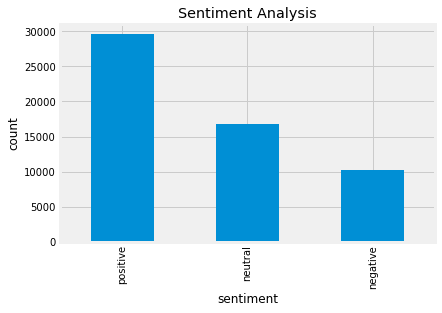

In [29]:
# visualize the value counts.
df['analysis'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Sentiment Analysis')
plt.show()